# BCG Virtual: Data Science & Advanced Analytics

**Sub-Task 1:**

Clean the data – you might have to address missing values, duplicates, data type conversions, transformations, and multicolinearity, as well as outliers.

**Sub-Task 2:**

Perform some exploratory data analysis. Look into the data types, data statistics, and identify any missing data or null values, and how often they appear in the data. Visualize specific parameters as well as variable distributions.

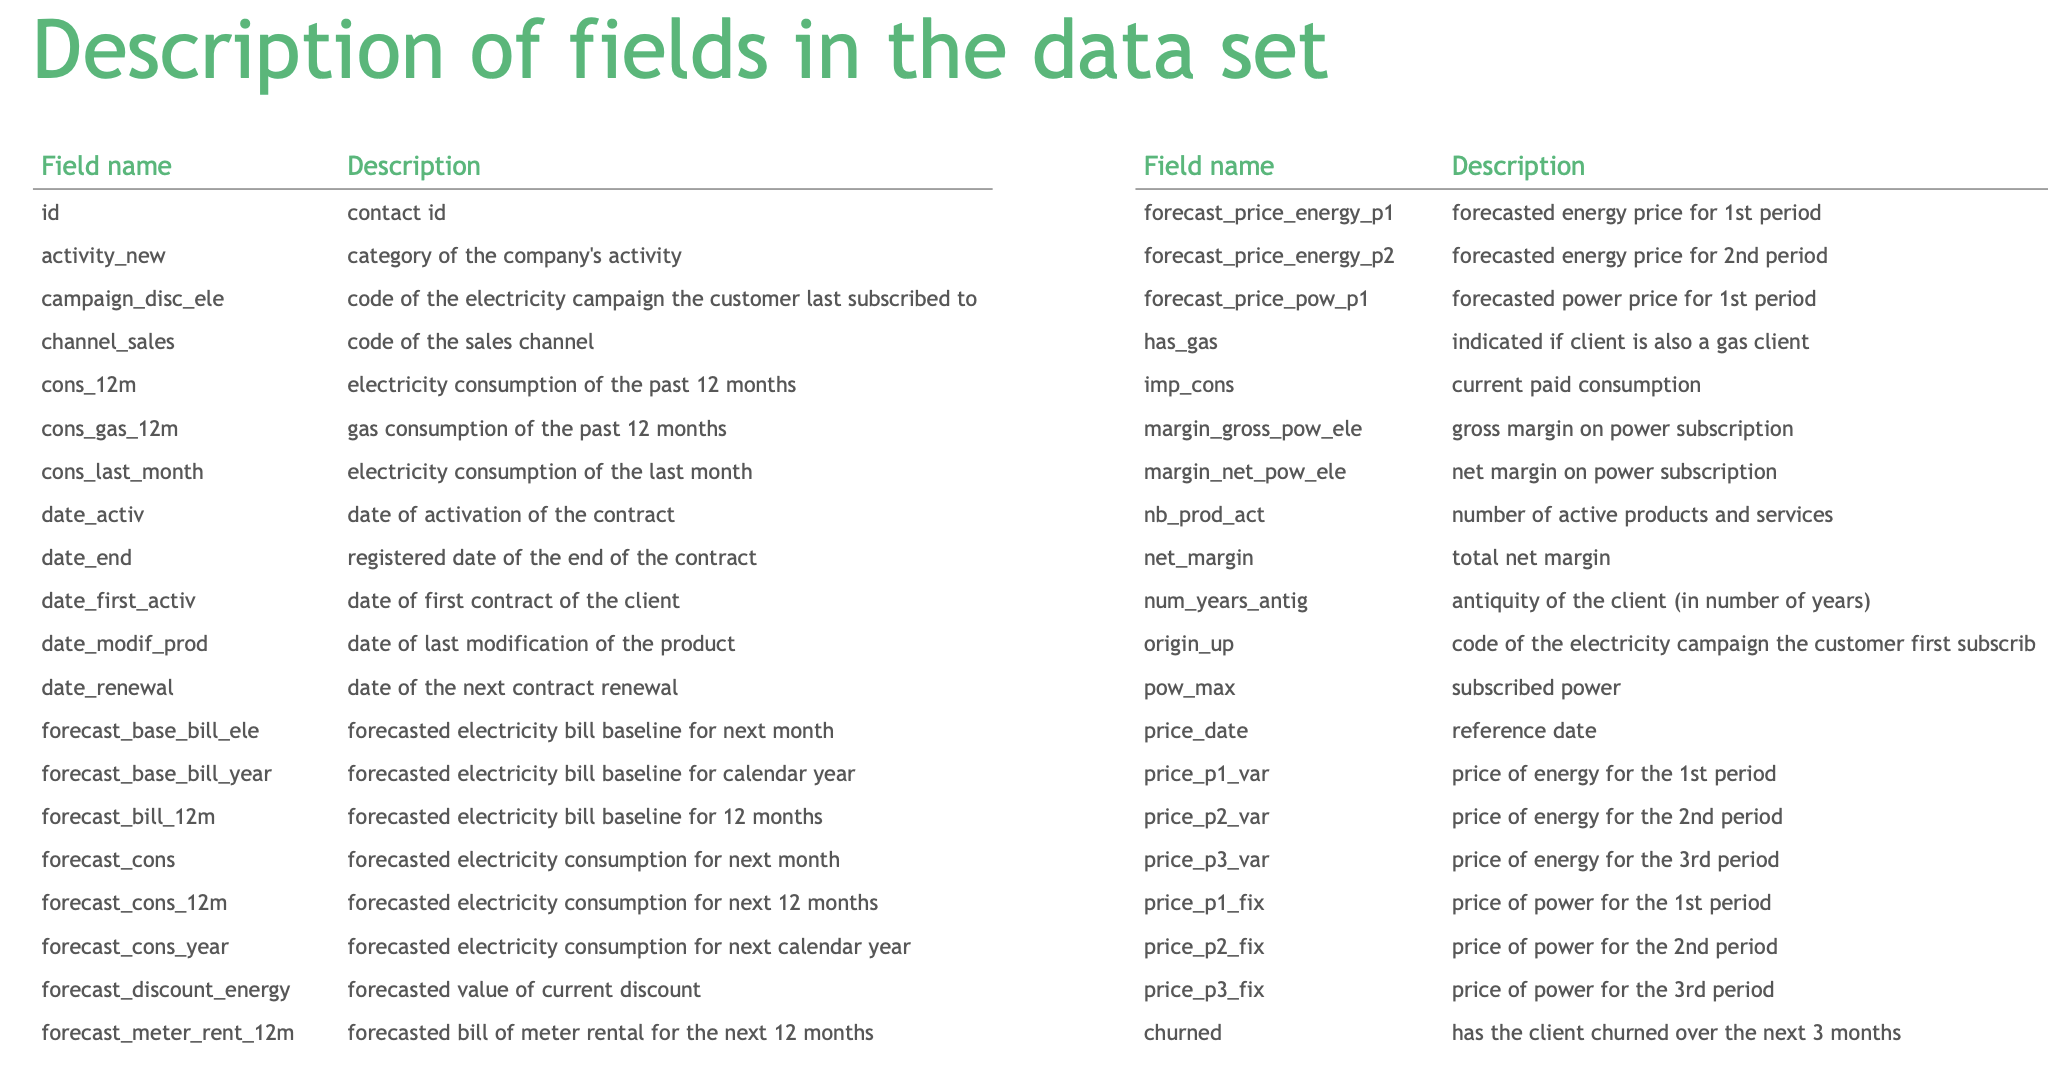

# Part I: Load data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [47]:
df_train = pd.read_csv('ml_case_training_data.csv')
print(df_train.shape)
df_train.head()

(16096, 32)


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [48]:
df_history = pd.read_csv('ml_case_training_hist_data.csv')
print(df_history.shape)
df_history.head()

(193002, 8)


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [49]:
df_churn = pd.read_csv('ml_case_training_output.csv')
print(df_churn.shape)
df_churn.head()

(16096, 2)


,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [50]:
# merge train data and churn data
df_train = pd.merge(df_train, df_churn, on='id')
df_train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [51]:
df_train.shape

(16096, 33)

In [52]:
df_train.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [53]:
df_history.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [54]:
df_train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [55]:
df_history.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Quick Observations:

In the train dataset:
- A plenty of missing values exist in column `campaign_disc_ele`
- Some consumption data and forest bill are negative
- Some datetime feature have mismatched data type, including `date_activ`,`date_end`, `date_first_activ`, `date_modif_prod` and `date_renewal` 

In the history dataset:
- some price values are negative in the columns `price_p1_fix`, `price_p2_fix`, and `price_p3_fix`.

# Part II: Data Wrangling

## Deal with missing values

In [56]:
# check the number of missing values in each column
df_train.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [57]:
# check the ratio of missing values in train dataset
df_train.isnull().sum().sort_values(ascending = False)/ len(df_train)

campaign_disc_ele           1.000000
date_first_activ            0.782058
forecast_cons               0.782058
forecast_base_bill_ele      0.782058
forecast_base_bill_year     0.782058
forecast_bill_12m           0.782058
activity_new                0.593004
channel_sales               0.262053
date_modif_prod             0.009754
forecast_price_pow_p1       0.007828
forecast_price_energy_p2    0.007828
forecast_discount_energy    0.007828
forecast_price_energy_p1    0.007828
origin_up                   0.005405
date_renewal                0.002485
net_margin                  0.000932
margin_net_pow_ele          0.000808
margin_gross_pow_ele        0.000808
pow_max                     0.000186
date_end                    0.000124
cons_last_month             0.000000
cons_gas_12m                0.000000
date_activ                  0.000000
cons_12m                    0.000000
churn                       0.000000
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
f

Observation:
- The `campaign_disc_ele` data is completely missing.
- Some features have high ratios of missing values, including `date_first_activ`, `forecast_cons`, `forecast_base_bill_ele` and `forecast_base_bill_year`, `forecast_bill_12m`, and `activity_new`. I would like to remove them.
- For missing values in `channel_sales`, I suggest to impute them with the most frequent values.
- For a small amount of missing values in other columns, I will drop the records

In [58]:
train_clean = df_train.drop(['campaign_disc_ele','date_first_activ','forecast_cons',
                             'forecast_base_bill_ele','forecast_base_bill_year',
                             'forecast_bill_12m','activity_new'], axis = 1)
train_clean.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # strategy can be mean/ median
train_clean['channel_sales'] = imputer.fit_transform(df_train[['channel_sales']])

In [60]:
# drop records with other missing values
train_clean = train_clean.dropna()

In [61]:
# check missing values again
train_clean.isnull().sum().sort_values(ascending = False)/ len(df_train)

churn                       0.0
pow_max                     0.0
channel_sales               0.0
cons_12m                    0.0
cons_gas_12m                0.0
cons_last_month             0.0
date_activ                  0.0
date_end                    0.0
date_modif_prod             0.0
date_renewal                0.0
forecast_cons_12m           0.0
forecast_cons_year          0.0
forecast_discount_energy    0.0
forecast_meter_rent_12m     0.0
forecast_price_energy_p1    0.0
forecast_price_energy_p2    0.0
forecast_price_pow_p1       0.0
has_gas                     0.0
imp_cons                    0.0
margin_gross_pow_ele        0.0
margin_net_pow_ele          0.0
nb_prod_act                 0.0
net_margin                  0.0
num_years_antig             0.0
origin_up                   0.0
id                          0.0
dtype: float64

In [62]:
# check the ratio of missing values in history dataset
df_history.isnull().sum().sort_values(ascending = False)/ len(df_train)

price_p3_fix    0.084431
price_p2_fix    0.084431
price_p1_fix    0.084431
price_p3_var    0.084431
price_p2_var    0.084431
price_p1_var    0.084431
price_date      0.000000
id              0.000000
dtype: float64

Observation:
- 8% data are missing from price features. I choose to impute the missing values with mean values.


In [63]:
history_clean= df_history.copy()

temp_mean = np.floor(df_history['price_p3_fix'].mean())
history_clean['price_p3_fix'] = df_history['price_p3_fix'].fillna(temp_mean)

temp_mean = np.floor(df_history['price_p2_fix'].mean())
history_clean['price_p2_fix'] = df_history['price_p2_fix'].fillna(temp_mean)

temp_mean = np.floor(df_history['price_p1_fix'].mean())
history_clean['price_p1_fix'] = df_history['price_p1_fix'].fillna(temp_mean)

temp_mean = np.floor(df_history['price_p3_var'].mean())
history_clean['price_p3_var'] = df_history['price_p3_var'].fillna(temp_mean)

temp_mean = np.floor(df_history['price_p2_var'].mean())
history_clean['price_p2_var'] = df_history['price_p2_var'].fillna(temp_mean)

temp_mean = np.floor(df_history['price_p1_var'].mean())
history_clean['price_p1_var'] = df_history['price_p1_var'].fillna(temp_mean)

In [64]:
# check the ratio of missing values in history dataset again
history_clean.isnull().sum().sort_values(ascending = False)/ len(df_train)

price_p3_fix    0.0
price_p2_fix    0.0
price_p1_fix    0.0
price_p3_var    0.0
price_p2_var    0.0
price_p1_var    0.0
price_date      0.0
id              0.0
dtype: float64

In [65]:
print(train_clean.shape)
print(history_clean.shape)

(15674, 26)
(193002, 8)


After dealing with missing values, we have 15674 observations and 26 columns in the train dataset. And, we have 193002 observations and 8 columns in the dataset.

## Deal with mismatched data types

In [66]:
# train dataset: convert date features to datatime type
train_clean['date_activ'] = pd.to_datetime(train_clean['date_activ'], errors = 'coerce')
train_clean['date_end'] = pd.to_datetime(train_clean['date_end'], errors = 'coerce')
train_clean['date_modif_prod'] = pd.to_datetime(train_clean['date_modif_prod'], errors = 'coerce')
train_clean['date_renewal'] = pd.to_datetime(train_clean['date_renewal'], errors = 'coerce')
train_clean.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
2,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
5,568bb38a1afd7c0fc49c77b3789b59a3,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0


In [67]:
# history dataset: convert date features to datatime type
history_clean['price_date'] = pd.to_datetime(history_clean['price_date'], errors = 'coerce')

## Deal with outliers

In [68]:
train_clean.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.567400e+04,1.567400e+04,1.567400e+04,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.915538e+05,3.132277e+04,1.929701e+04,2350.149525,1888.518311,0.976139,70.163502,0.135925,0.052858,43.522175,194.139225,22.400375,21.372271,1.348092,217.349803,5.052188,20.438270,0.096976
std,6.724861e+05,1.716293e+05,8.229678e+04,3985.239567,5233.237167,5.124103,78.602849,0.026282,0.048638,5.221781,491.951025,23.609510,27.938879,1.475092,364.414103,1.670284,21.164053,0.295934
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,5.883500e+03,0.000000e+00,0.000000e+00,512.210000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.950000,11.950000,1.000000,51.962500,4.000000,12.500000,0.000000
50%,1.520100e+04,0.000000e+00,8.960000e+02,1176.060000,376.000000,0.000000,19.430000,0.142881,0.086163,44.311378,43.980000,20.950000,20.800000,1.000000,119.385000,5.000000,13.856000,0.000000
75%,4.948550e+04,0.000000e+00,4.096000e+03,2673.220000,1990.000000,0.000000,131.500000,0.146348,0.098837,44.311378,217.352500,29.640000,29.585000,1.000000,274.130000,6.000000,19.800000,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


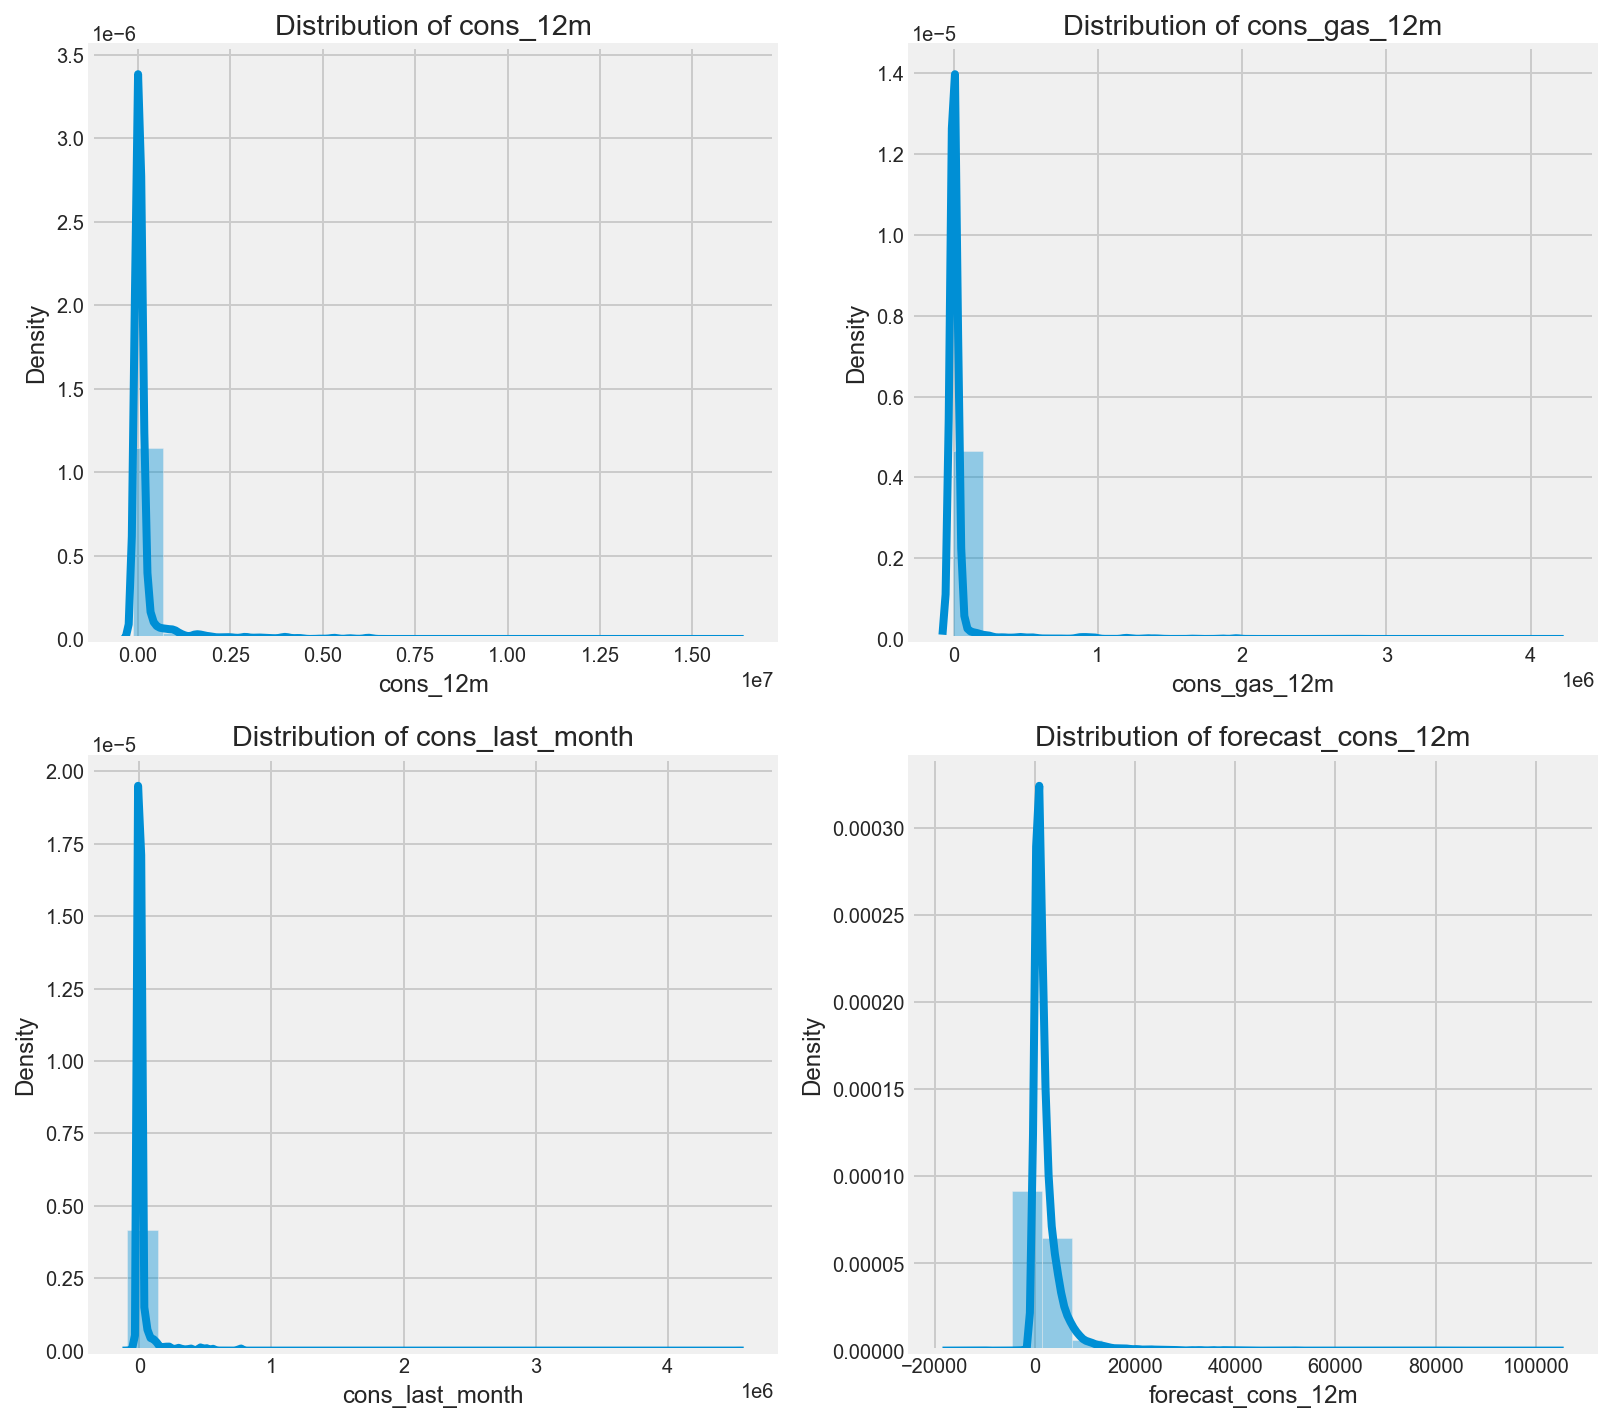

In [69]:
#detect outliers by visualization

# 设置画布大小
fig = plt.figure(figsize = (12, 12))

ax1= fig.add_subplot(221) 
sns.distplot(train_clean['cons_12m'], kde = True, bins = 20)
ax1.set(title="Distribution of cons_12m");

ax2= fig.add_subplot(222) 
sns.distplot(train_clean['cons_gas_12m'], kde = True, bins = 20)
ax2.set(title="Distribution of cons_gas_12m");

ax3= fig.add_subplot(223) 
sns.distplot(train_clean['cons_last_month'], kde = True, bins = 20)
ax3.set(title="Distribution of cons_last_month");

ax4= fig.add_subplot(224) 
sns.distplot(train_clean['forecast_cons_12m'], kde = True, bins = 20)
ax4.set(title="Distribution of forecast_cons_12m");

Observation:

- Both consumption data and forecast consumption data are highly skewed. It somehow makes sense. However, there is no hint that why those features have negative values.
- For simplisity, I suggest to replace those negative values with median values.
- I will remove the extreme values.

In [25]:
def remove_extreme(df, col):
    df.loc[df[col]<0, col]=df[col].median()
    # let's use IQR method to detect outliers
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + (iqr * 1.5)
    df = df[df[col] < upper_bound]

In [26]:
remove_extreme(train_clean,'cons_12m')
remove_extreme(train_clean,'cons_gas_12m')
remove_extreme(train_clean,'cons_last_month')
remove_extreme(train_clean,'forecast_cons_12m')
remove_extreme(train_clean,'forecast_meter_rent_12m')
remove_extreme(train_clean,'forecast_cons_year')

In [27]:
train_clean.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.567400e+04,1.567400e+04,1.567400e+04,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000,15674.000000
mean,1.916083e+05,3.132338e+04,1.935885e+04,2357.764220,1900.708052,0.976139,70.192192,0.135925,0.052858,43.522175,194.139225,22.400375,21.372271,1.348092,217.349803,5.052188,20.438270,0.096976
std,6.724686e+05,1.716292e+05,8.226206e+04,3975.789562,5178.295594,5.124103,78.548435,0.026282,0.048638,5.221781,491.951025,23.609510,27.938879,1.475092,364.414103,1.670284,21.164053,0.295934
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,5.924000e+03,0.000000e+00,0.000000e+00,516.267500,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.950000,11.950000,1.000000,51.962500,4.000000,12.500000,0.000000
50%,1.520100e+04,0.000000e+00,8.960000e+02,1176.135000,376.000000,0.000000,19.430000,0.142881,0.086163,44.311378,43.980000,20.950000,20.800000,1.000000,119.385000,5.000000,13.856000,0.000000
75%,4.948550e+04,0.000000e+00,4.096000e+03,2673.220000,1990.000000,0.000000,131.500000,0.146348,0.098837,44.311378,217.352500,29.640000,29.585000,1.000000,274.130000,6.000000,19.800000,0.000000
max,1.609711e+07,4.154590e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [28]:
# Do the same preprocession on history dataset
history_clean.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.139999,0.054028,0.030496,43.323254,10.693284,6.452230
std,0.027666,0.050064,0.036298,5.418841,12.810837,7.754925
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125746,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.145859,0.085100,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [29]:
history_clean.loc[history_clean["price_p1_fix"] <0,"price_p1_fix"] =history_clean["price_p1_fix"].median()
history_clean.loc[history_clean["price_p2_fix"] <0,"price_p2_fix"] =history_clean["price_p2_fix"].median()
history_clean.loc[history_clean["price_p3_fix"] <0,"price_p3_fix"] =history_clean["price_p3_fix"].median()

## Check highly corelated data

In [30]:
# correlation
correlation = train_clean.corr()
correlation

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.490609,0.925174,0.167217,0.143911,-0.043575,0.086316,-0.031843,0.145381,-0.024241,0.137060,-0.068191,-0.047584,0.315952,0.122949,0.012221,0.105357,-0.049691
cons_gas_12m,0.490609,1.000000,0.466867,0.060472,0.059519,-0.015799,0.040819,-0.023048,0.077800,-0.028199,0.061737,-0.016537,-0.007652,0.281175,0.061016,-0.009180,0.055764,-0.041314
cons_last_month,0.925174,0.466867,1.000000,0.131289,0.150359,-0.037528,0.076476,-0.023917,0.122870,-0.019325,0.151720,-0.057064,-0.039792,0.357085,0.097485,0.008817,0.092199,-0.044611
forecast_cons_12m,0.167217,0.060472,0.131289,1.000000,0.749399,0.011538,0.387845,-0.216694,0.246131,0.058690,0.721331,-0.186869,-0.142702,0.013106,0.777662,0.065574,0.588486,0.010221
forecast_cons_year,0.143911,0.059519,0.150359,0.749399,1.000000,-0.010538,0.325664,-0.206717,0.228899,0.052809,0.969391,-0.140615,-0.106808,0.014583,0.542932,0.065984,0.445215,0.006373
forecast_discount_energy,-0.043575,-0.015799,-0.037528,0.011538,-0.010538,1.000000,-0.021713,0.320852,0.046970,0.025855,0.009965,0.200937,0.151153,0.054549,0.021641,-0.075738,-0.024484,0.014864
forecast_meter_rent_12m,0.086316,0.040819,0.076476,0.387845,0.325664,-0.021713,1.000000,-0.557047,0.638396,0.008914,0.290475,-0.014899,0.004846,0.000655,0.339028,0.108924,0.607561,0.036432
forecast_price_energy_p1,-0.031843,-0.023048,-0.023917,-0.216694,-0.206717,0.320852,-0.557047,1.000000,-0.363516,0.396641,-0.164160,0.185954,0.027511,0.024493,-0.186209,-0.201947,-0.350418,-0.002924
forecast_price_energy_p2,0.145381,0.077800,0.122870,0.246131,0.228899,0.046970,0.638396,-0.363516,1.000000,-0.137616,0.210582,0.063374,0.074153,0.026382,0.253123,0.103497,0.338859,0.027039
forecast_price_pow_p1,-0.024241,-0.028199,-0.019325,0.058690,0.052809,0.025855,0.008914,0.396641,-0.137616,1.000000,0.050892,-0.110724,-0.131089,-0.011016,-0.006777,-0.040599,0.047614,0.005850


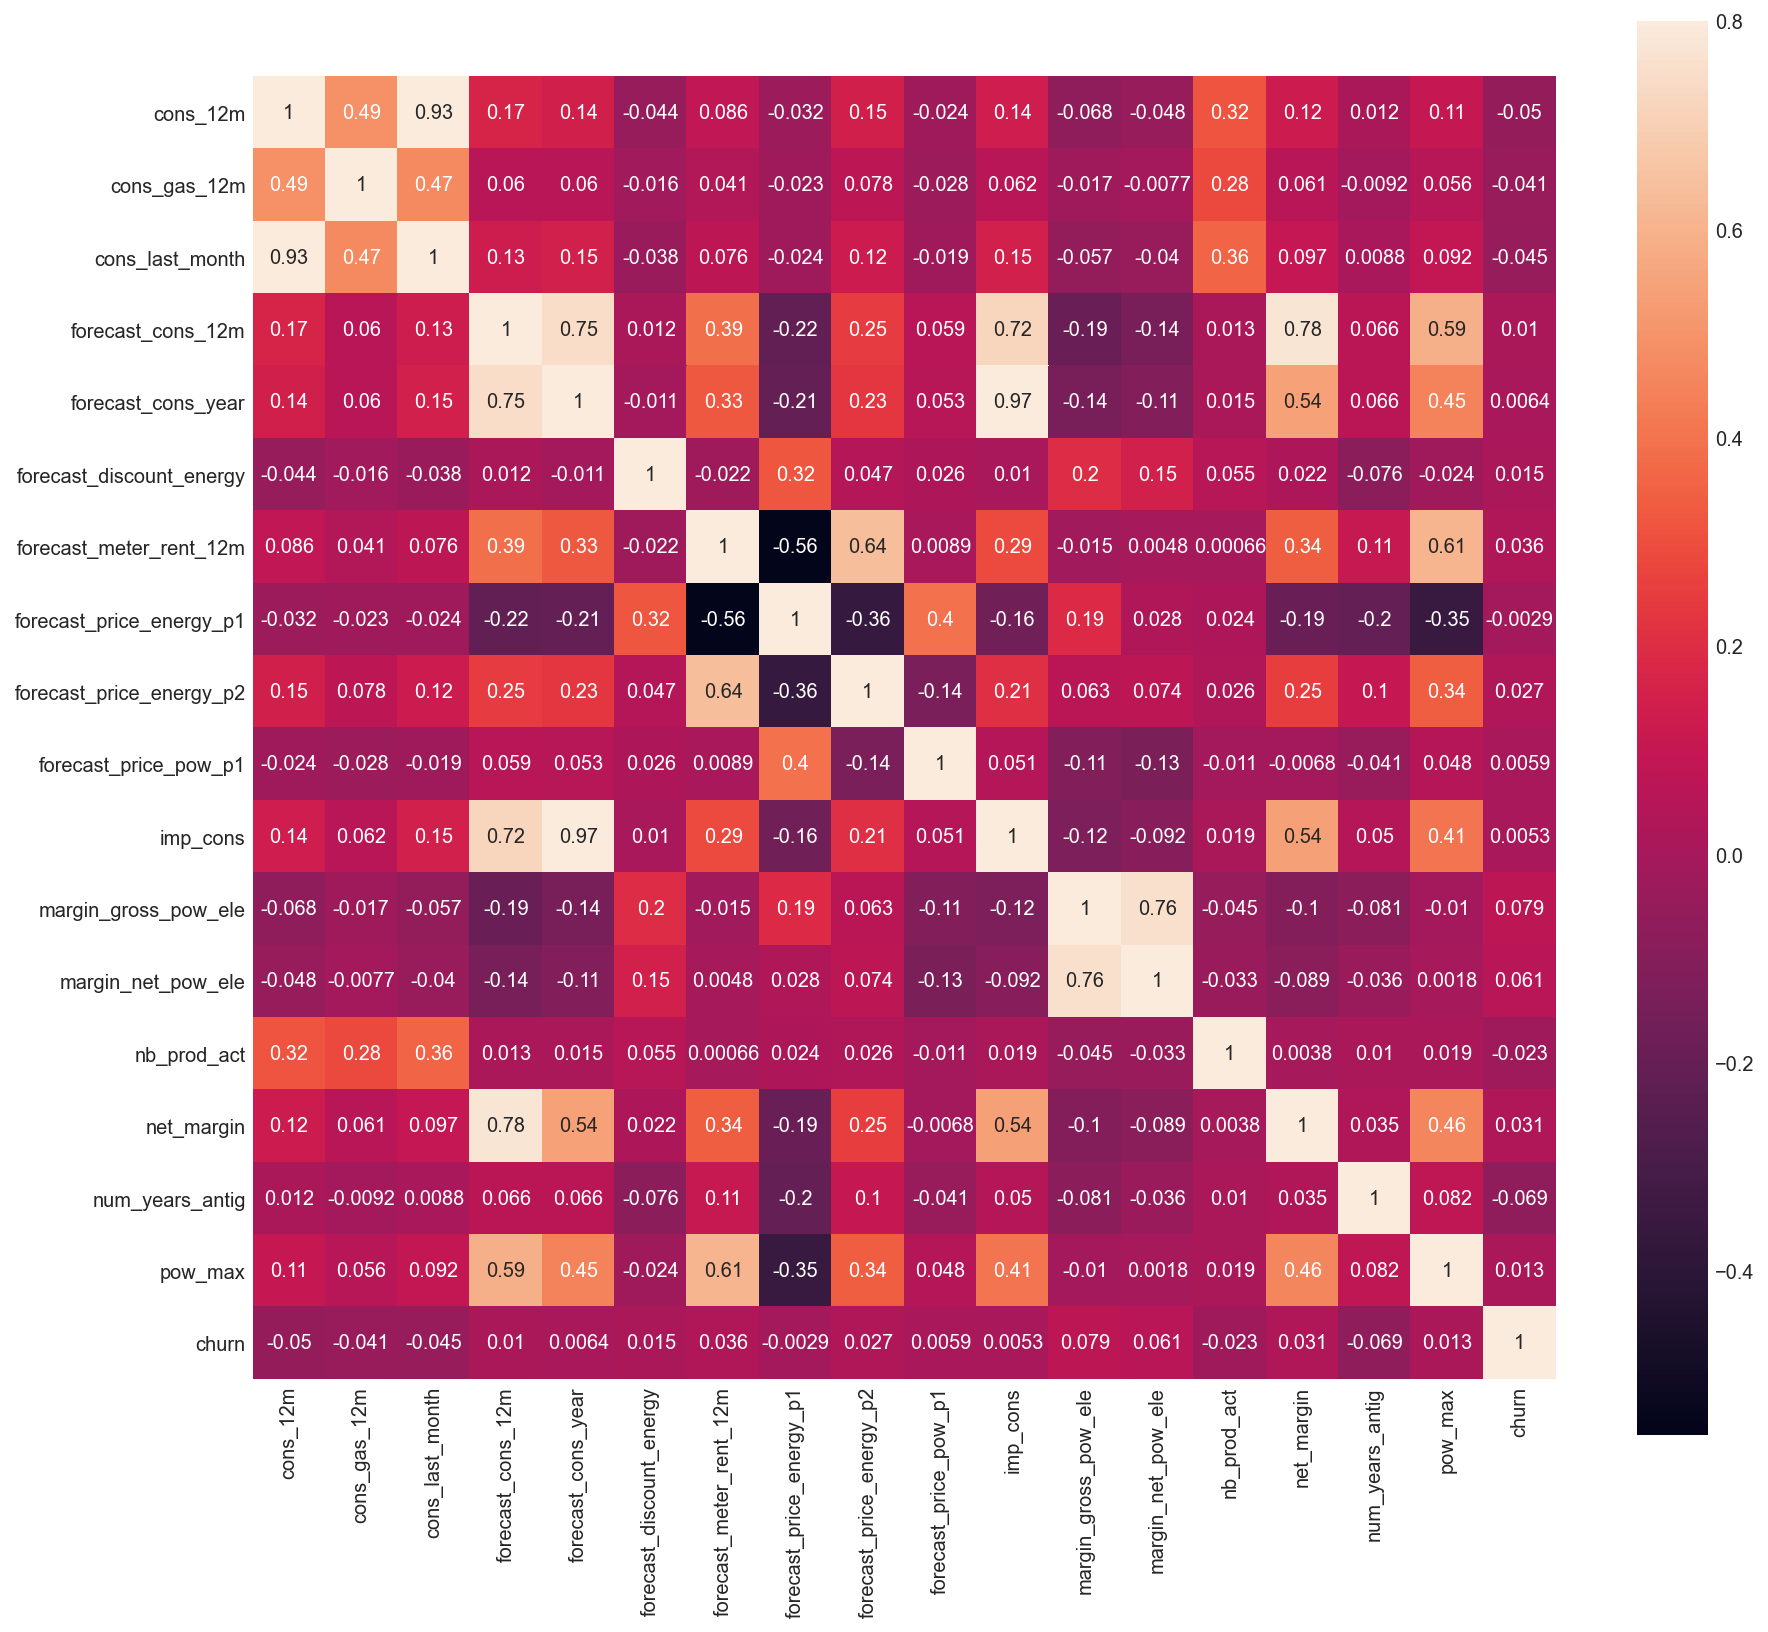

In [31]:
# heatmap for train dataset
fig = plt.figure(figsize = (13, 13))
sns.heatmap(correlation, vmax=.8, square=True, annot=True)

After data cleaning, we have 530477 observations and 20 columns.

# Part IV: Data Exploration

In [70]:
# conversion rate by country
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18

In [71]:
train_clean['churn'].value_counts()/train_clean.shape[0]

0    0.903024
1    0.096976
Name: churn, dtype: float64

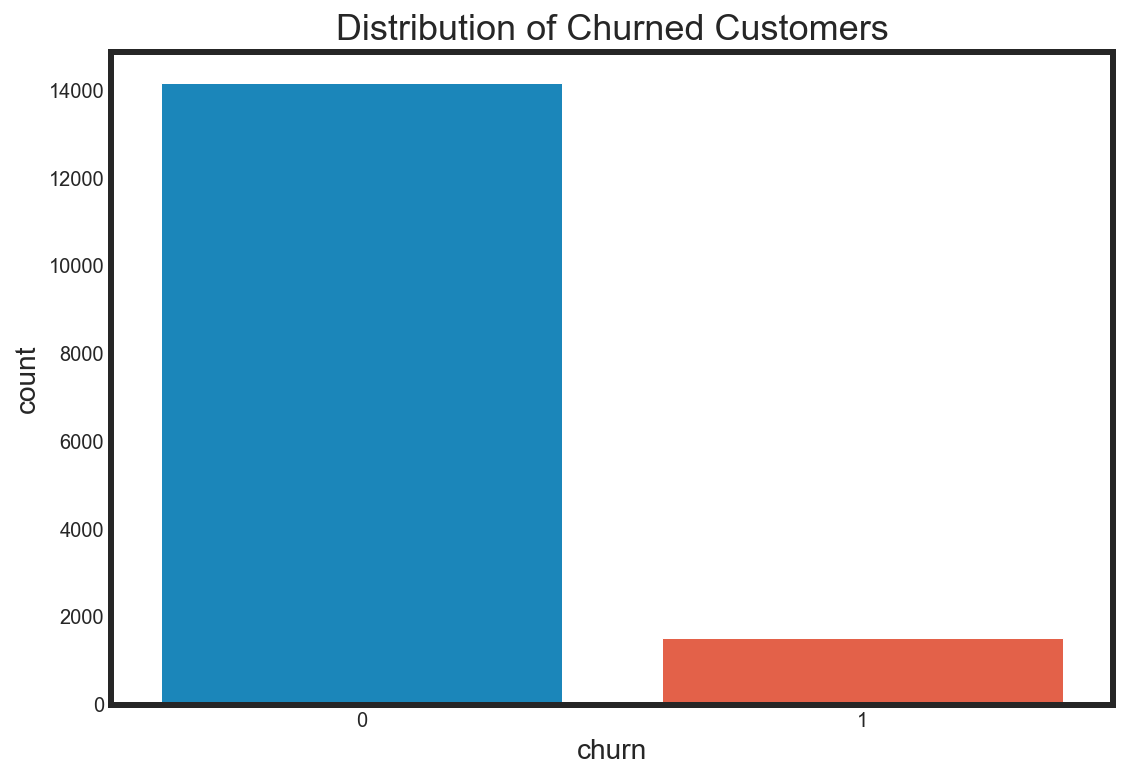

In [34]:
# show the distribution of target
#plt.figure(figsize=(10,8))
sns.countplot(x = 'churn', data= train_clean);
plt.title('Distribution of Churned Customers',fontsize=18);

Observation:
- Around 10% of the clients have churned.

In [72]:
train_clean['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    11267
lmkebamcaaclubfxadlmueccxoimlema     2038
usilxuppasemubllopkaafesmlibmsdf     1412
ewpakwlliwisiwduibdlfmalxowmwpci      943
sddiedcslfslkckwlfkdpoeeailfpeds       10
epumfxlbckeskwekxbiuasklxalciiuu        4
Name: channel_sales, dtype: int64

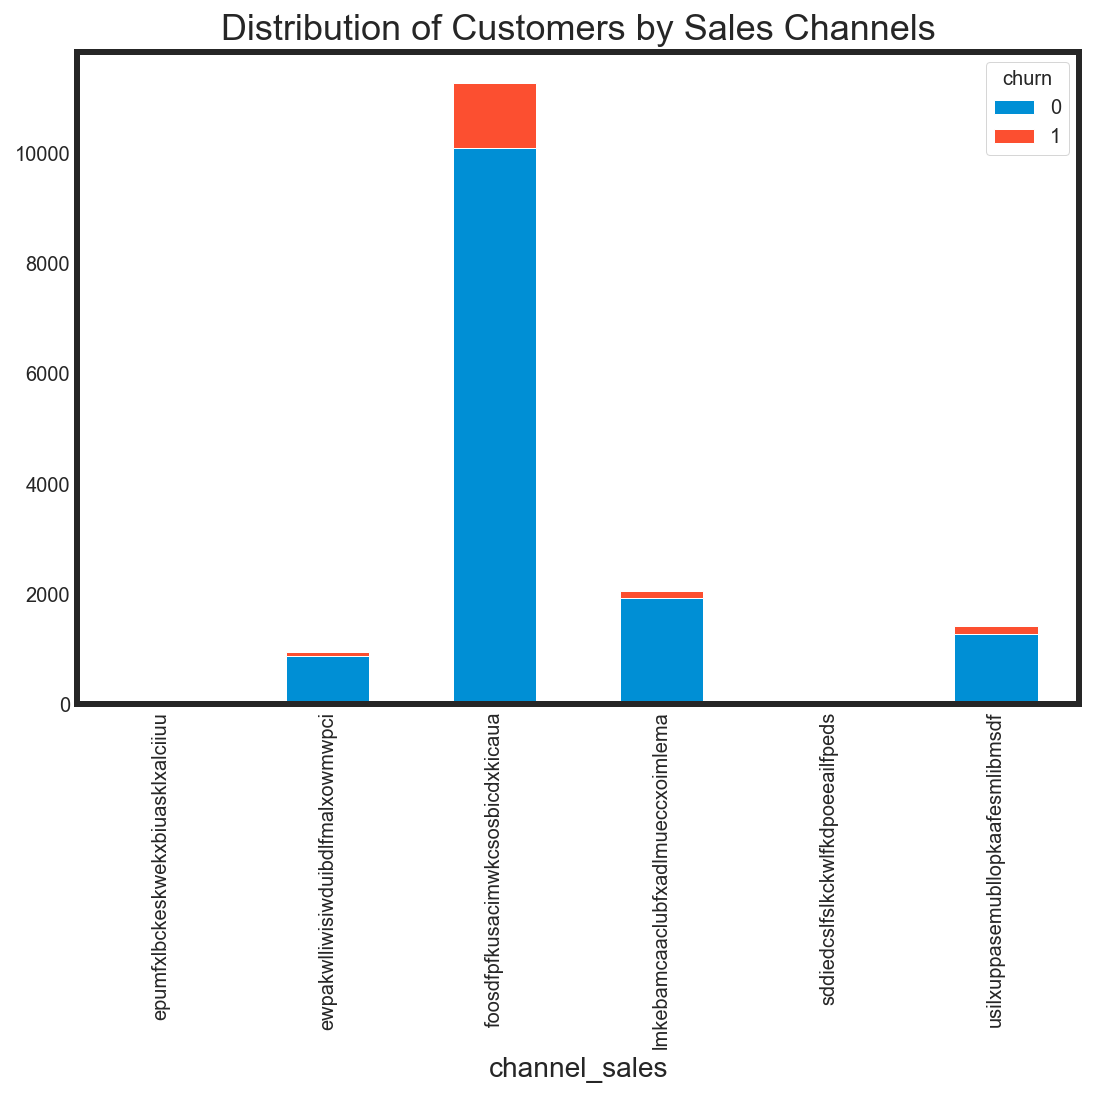

In [36]:
ct = pd.crosstab(train_clean.channel_sales, train_clean.churn);
ct.plot.bar(stacked=True);
plt.legend(title='churn');
plt.title('Distribution of Customers by Sales Channels');

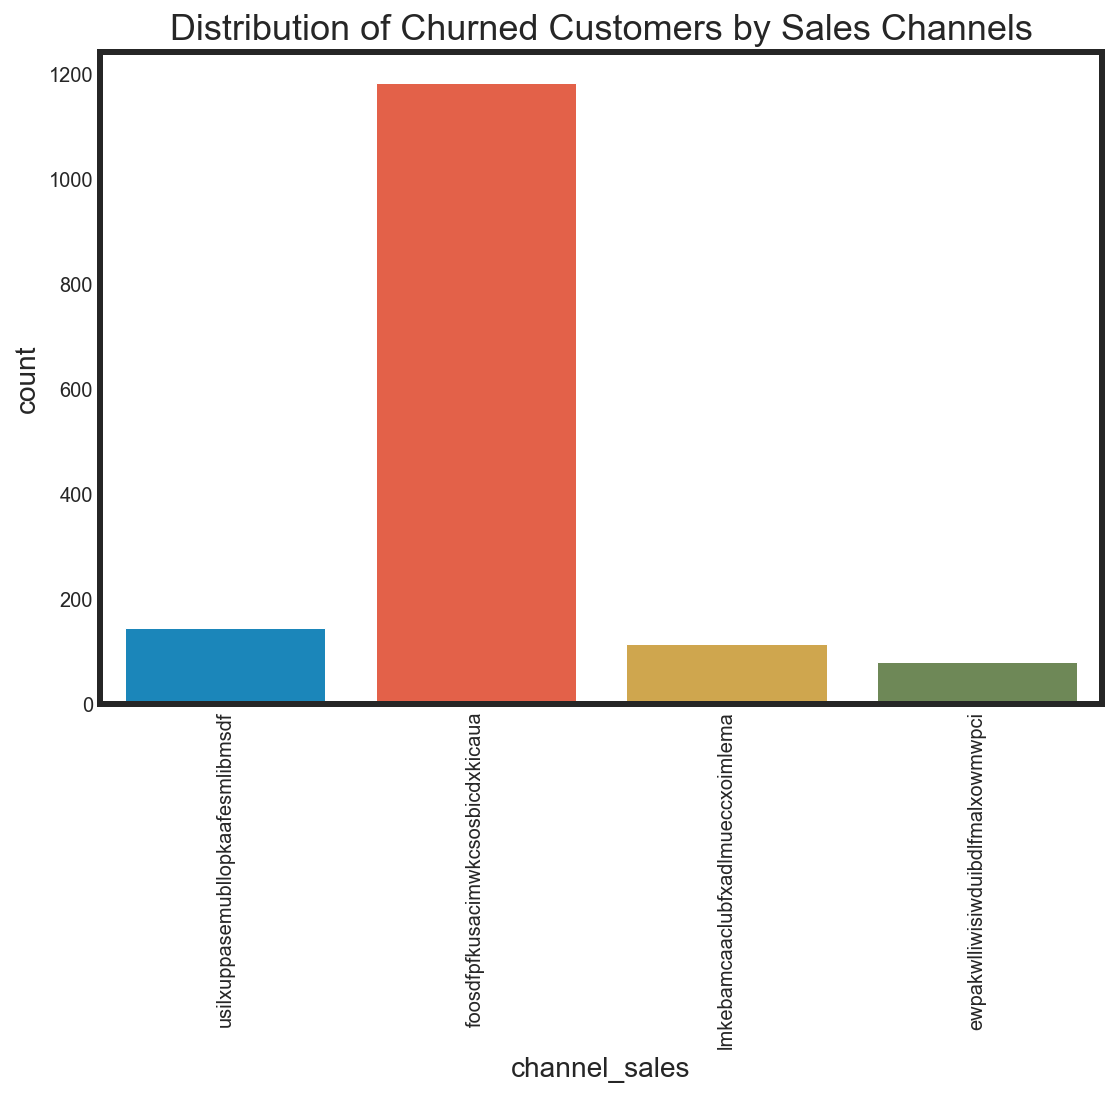

In [37]:
train_churn = train_clean[train_clean['churn']==1]
train_retain = train_clean[train_clean['churn']==0]

sns.countplot(x = 'channel_sales',data= train_churn);
plt.xticks(rotation=90);
plt.title('Distribution of Churned Customers by Sales Channels');

Observation:
- According to the distribution of customers by sales channels, the sales channel begin with the letter 'f' covers a high percentage of customers. It follows by the sales channel 'lm', 'us' and 'ew'.
- If we look at the churn percentage, the sales channel 'f' has a very high churn ratio, then it followed by  and sales channels 'us', 'lm' and 'ew'.

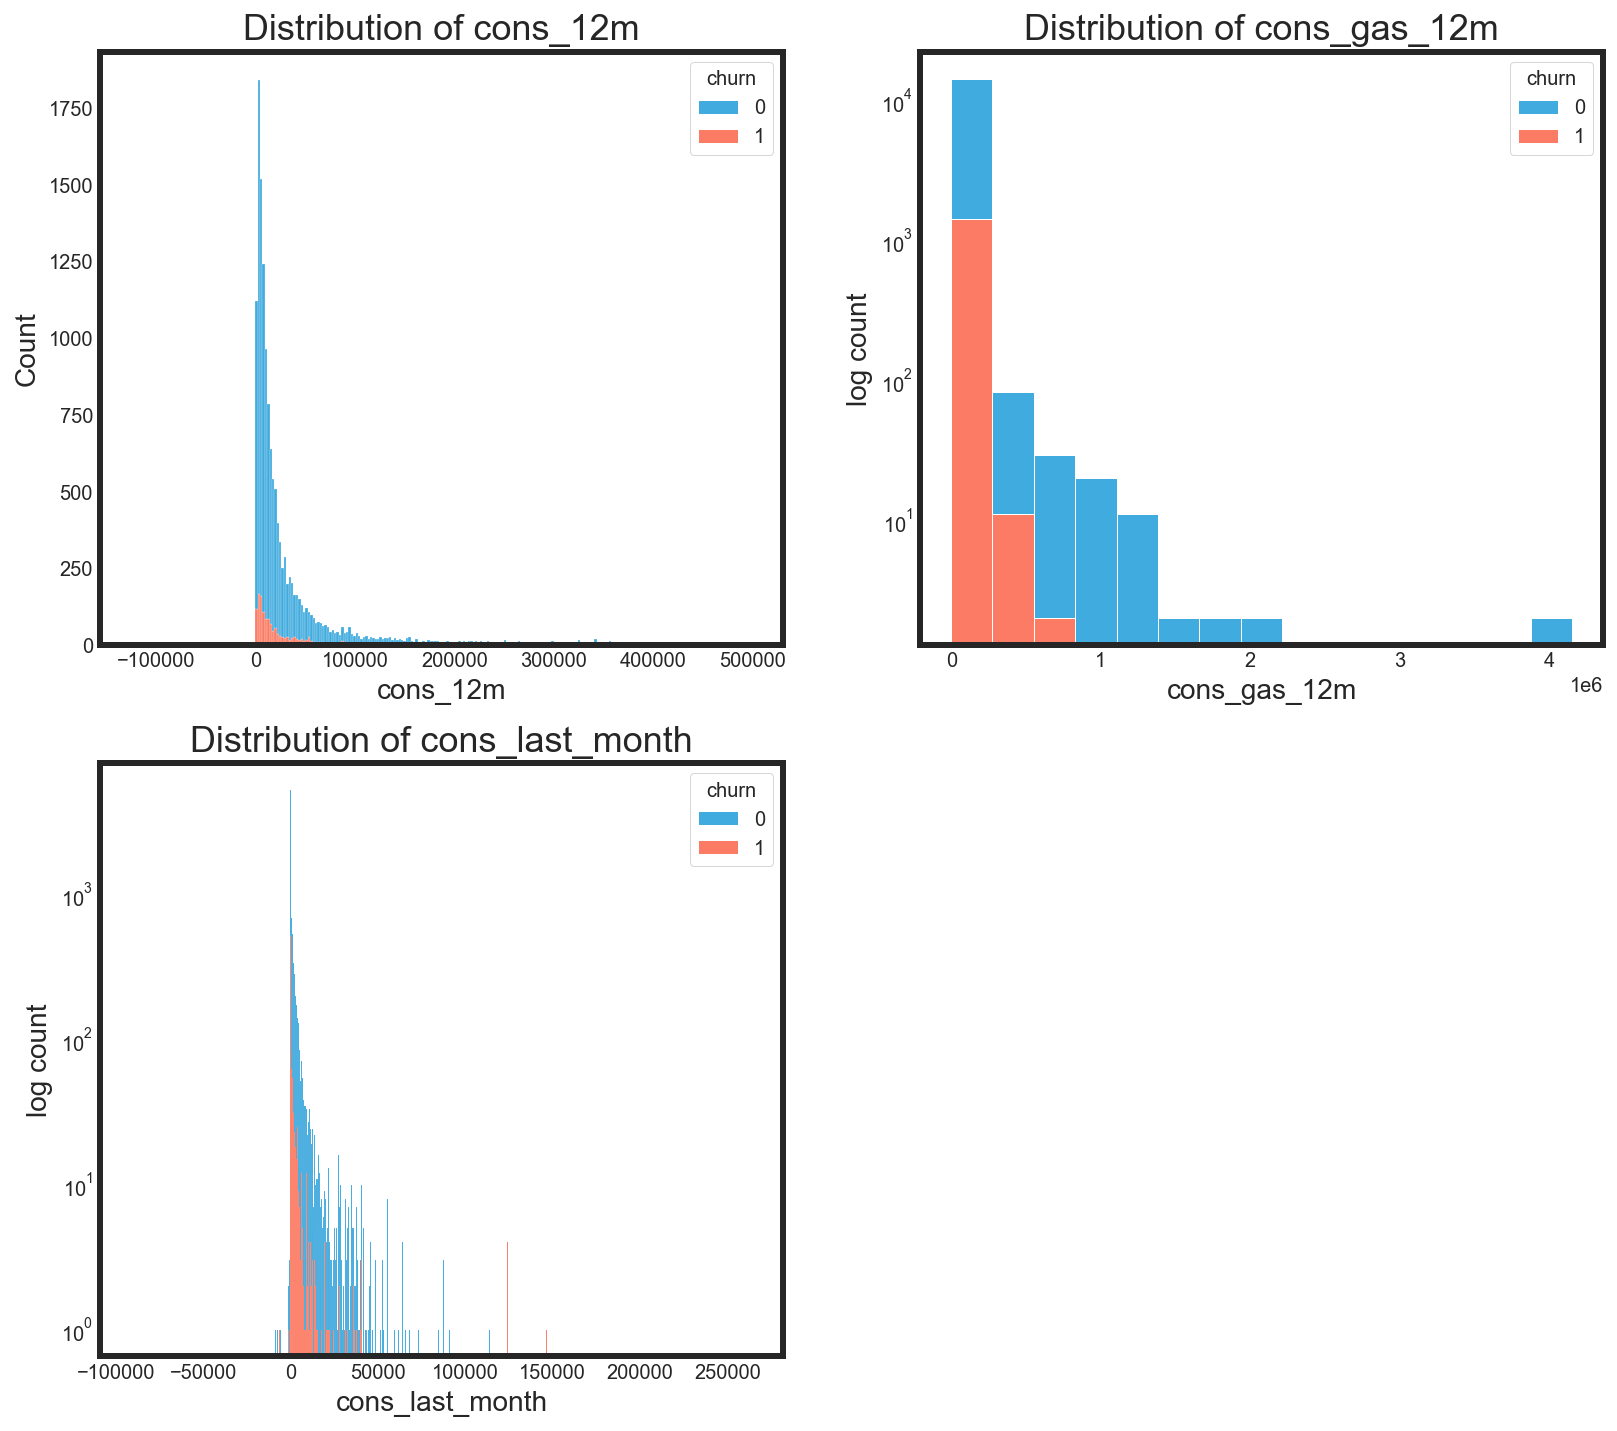

In [88]:
fig = plt.figure(figsize = (12, 12))
temp = train_clean[train_clean['cons_12m']<500000]

ax1= fig.add_subplot(221) 
sns.histplot(data=temp, x="cons_12m",hue='churn',multiple='stack');
ax1.set(title="Distribution of cons_12m");

ax2 = fig.add_subplot(222) 
sns.histplot(data=temp, x="cons_gas_12m",hue='churn',multiple='stack');
ax2.set(title="Distribution of cons_gas_12m", ylabel='log count');
ax2.set_yscale('log');

ax3= fig.add_subplot(223) 
sns.histplot(data=temp, x="cons_last_month",hue='churn',multiple='stack');
ax3.set(title="Distribution of cons_last_month", ylabel='log count');
ax3.set_yscale('log');

Observations:
- Gas and electricity consumptions are highly skewed.
- Churned customers are more likely to have relatively low consumption.

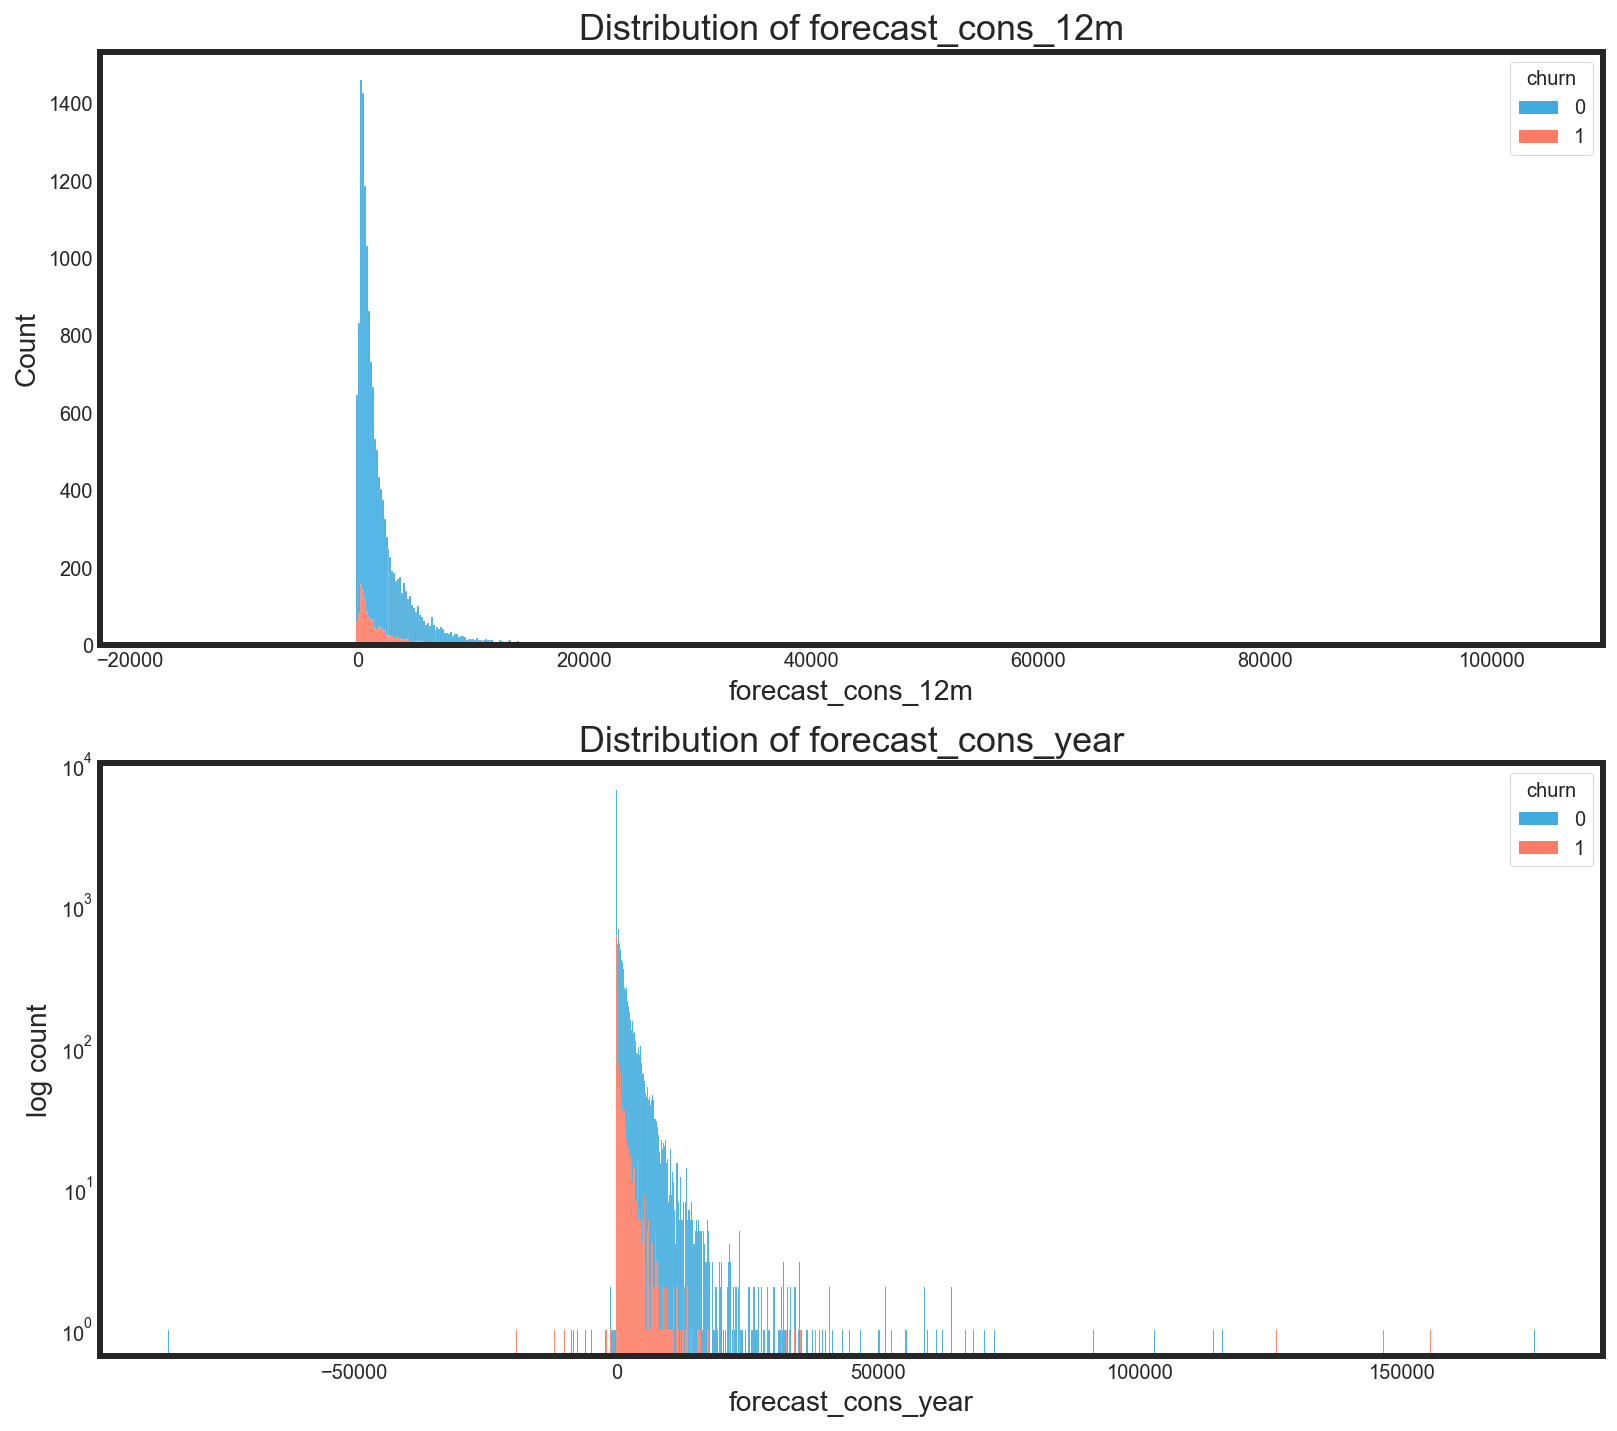

In [89]:
fig = plt.figure(figsize = (12, 12))

ax1= fig.add_subplot(211) 
sns.histplot(data=train_clean, x="forecast_cons_12m",hue='churn',multiple='stack');
ax1.set(title="Distribution of forecast_cons_12m");

ax2 = fig.add_subplot(212) 
sns.histplot(data=train_clean, x="forecast_cons_year",hue='churn',multiple='stack');
ax2.set(title="Distribution of forecast_cons_year", ylabel='log count');
ax2.set_yscale('log');

Observations:
- Similarly, churn customers are tend to have low forecast consumption.

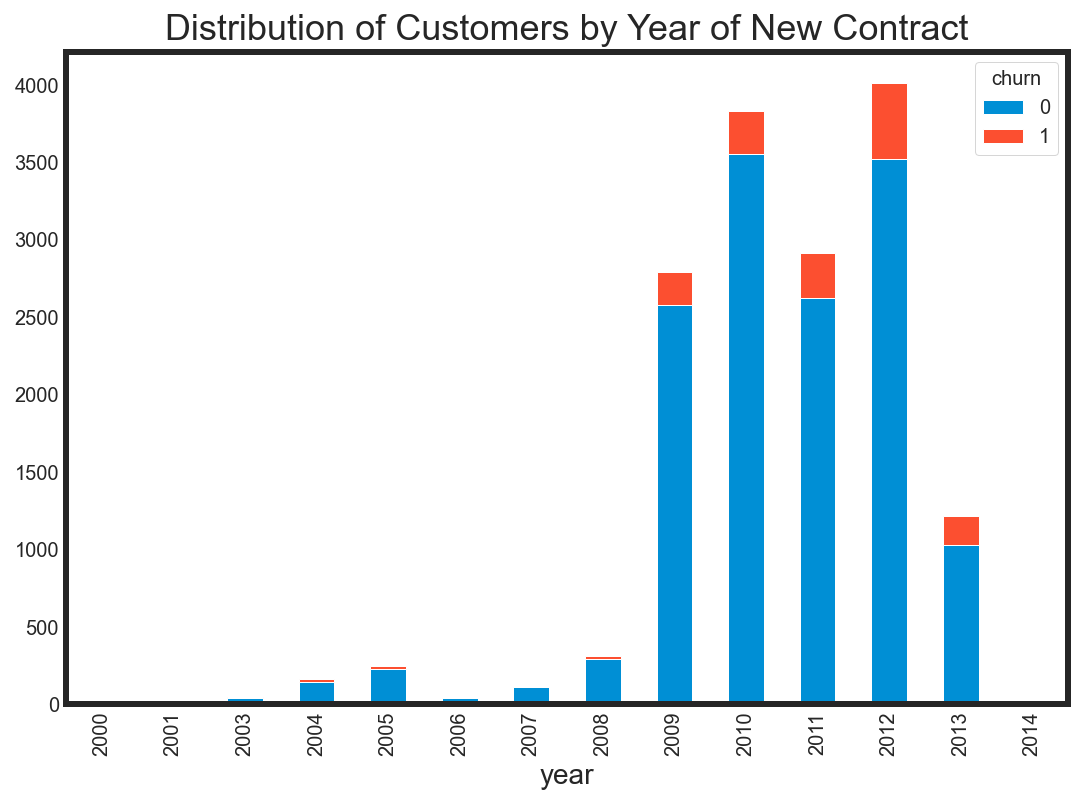

In [90]:
temp = train_clean.copy()
temp['year'] = temp['date_activ'].dt.year
ct = pd.crosstab(temp.year, temp.churn);
ct.plot.bar(stacked=True);
plt.legend(title='churn');
plt.title('Distribution of Customers by Year of New Contract');

Observations:
- New constracts that are activated in the last five years have a higher probability of churn, especially in the year of 2012.

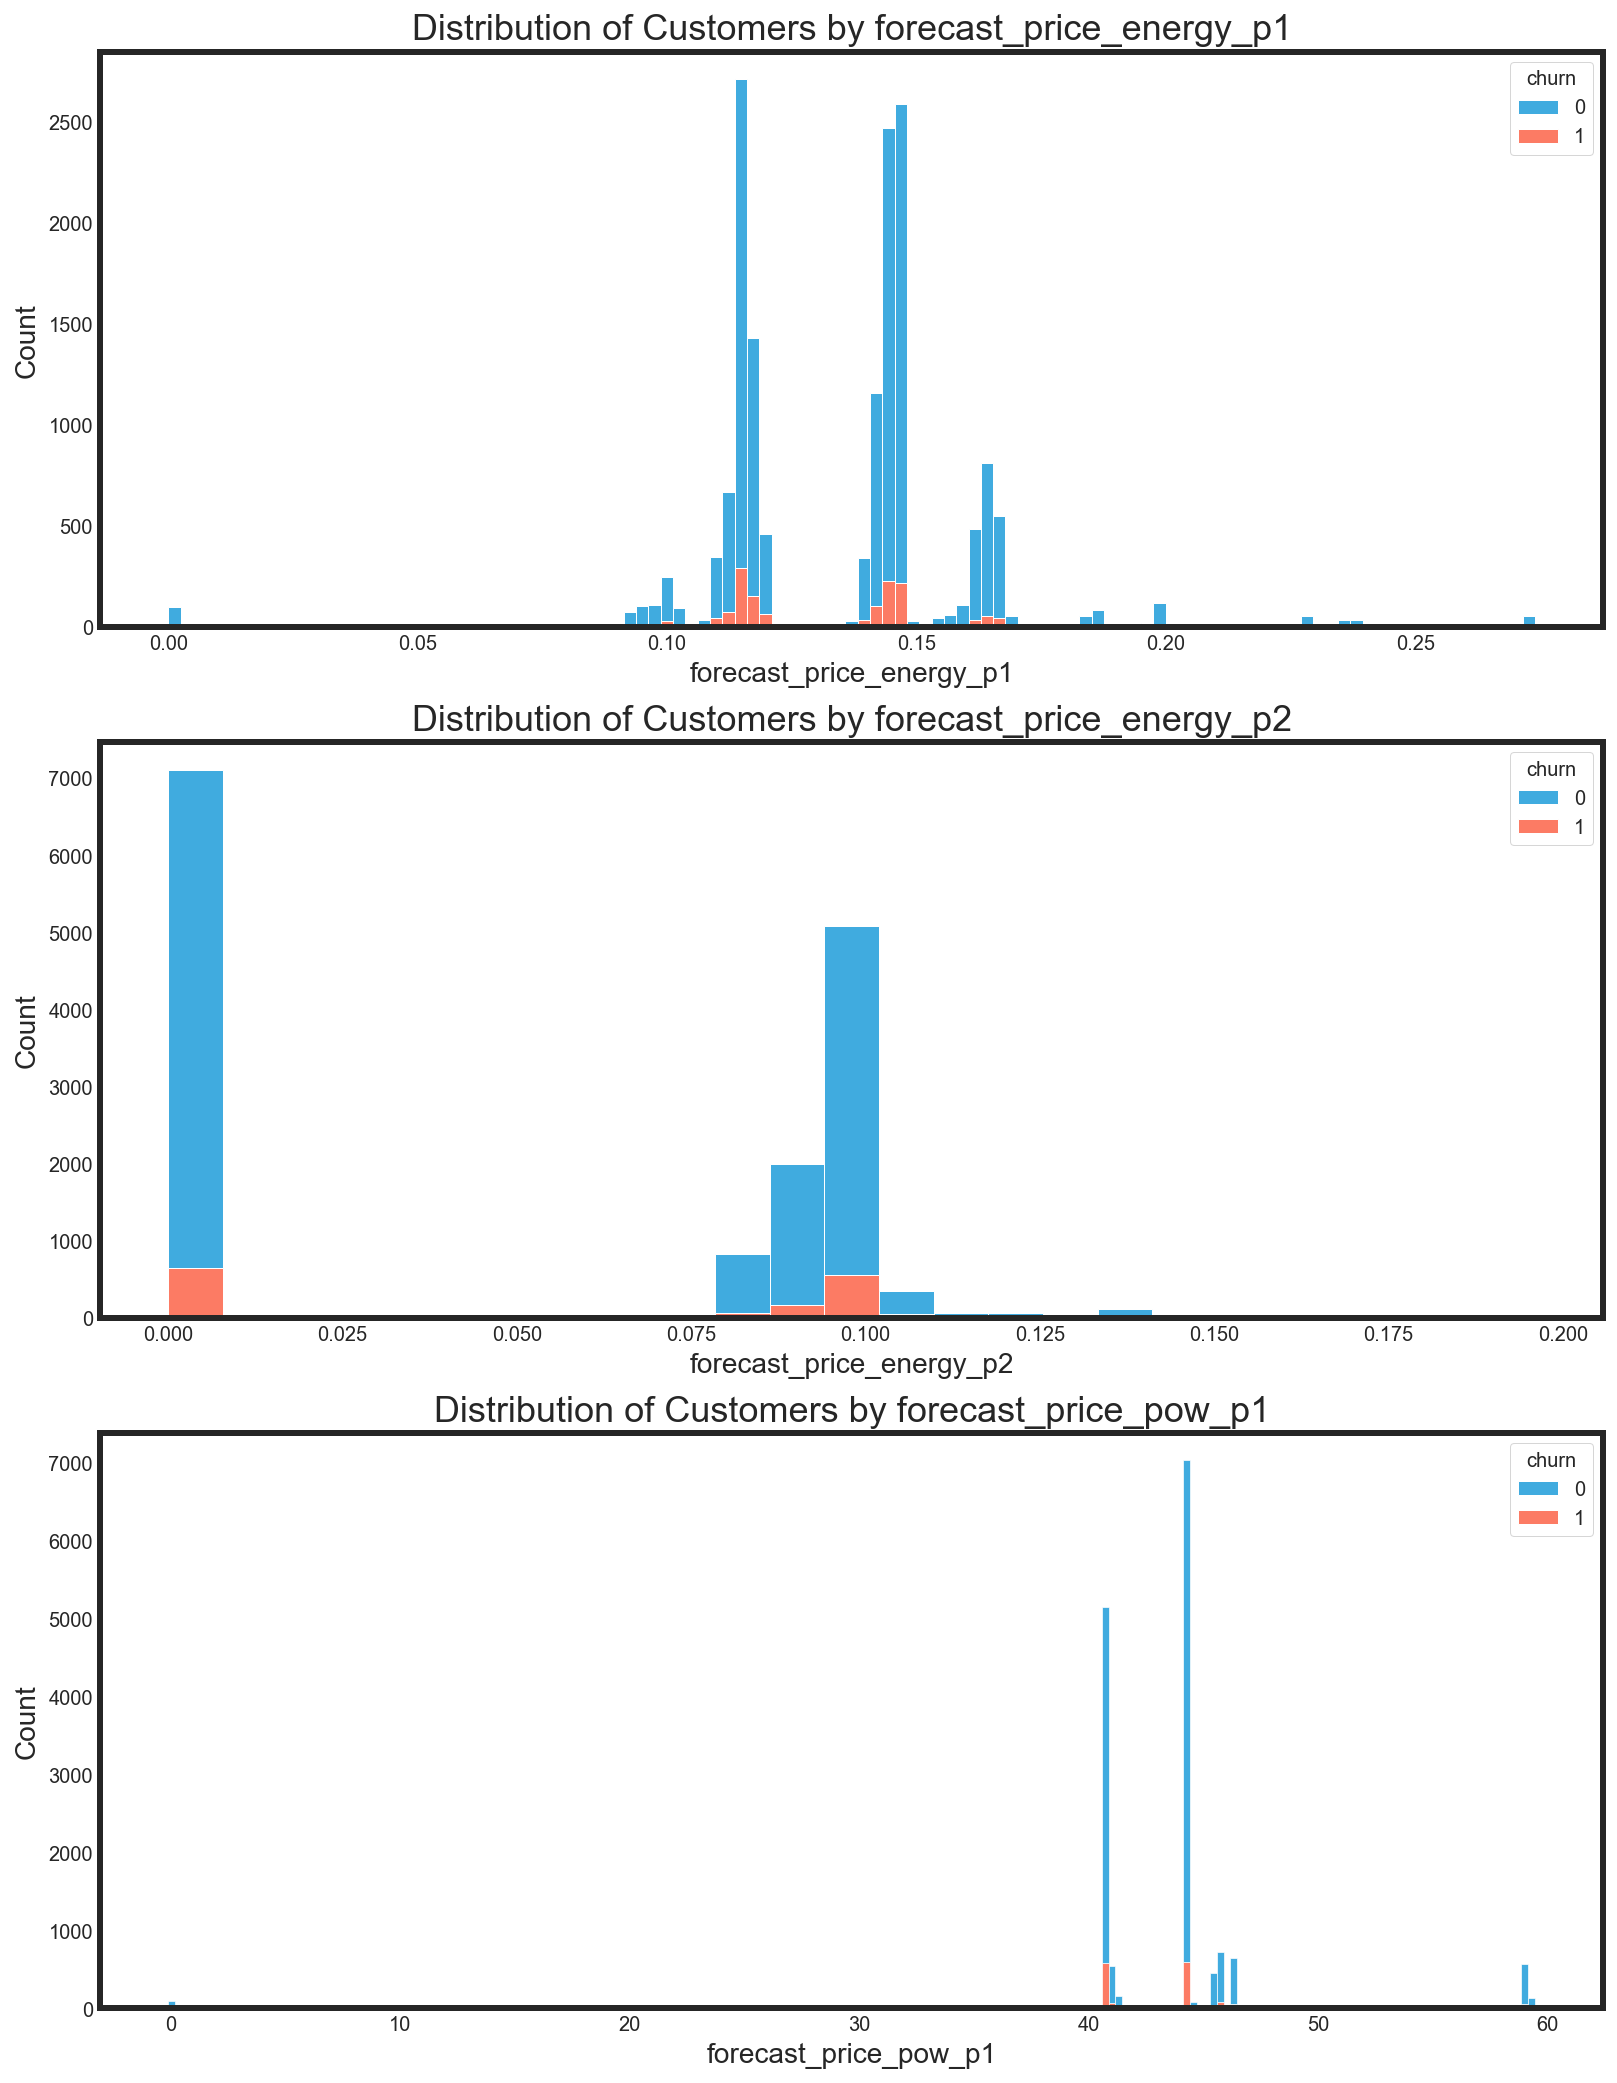

In [91]:
fig = plt.figure(figsize = (12, 18))

ax1= fig.add_subplot(311) 
sns.histplot(data=train_clean, x="forecast_price_energy_p1",hue='churn',multiple='stack');
ax1.set(title="Distribution of Customers by forecast_price_energy_p1");

ax2 = fig.add_subplot(312) 
sns.histplot(data=train_clean, x="forecast_price_energy_p2",hue='churn',multiple='stack');
ax2.set(title="Distribution of Customers by forecast_price_energy_p2");

ax3 = fig.add_subplot(313) 
sns.histplot(data=train_clean, x="forecast_price_pow_p1",hue='churn',multiple='stack');
ax3.set(title="Distribution of Customers by forecast_price_pow_p1");

Observations:
- Churned customers are more likely to appear in a certain range of energy price, such as around 0.12 and 0.15 in the first period, and around 0.1 in the second period.
- Also, churned customers are more likely to appear when power price is around 40 or 45.

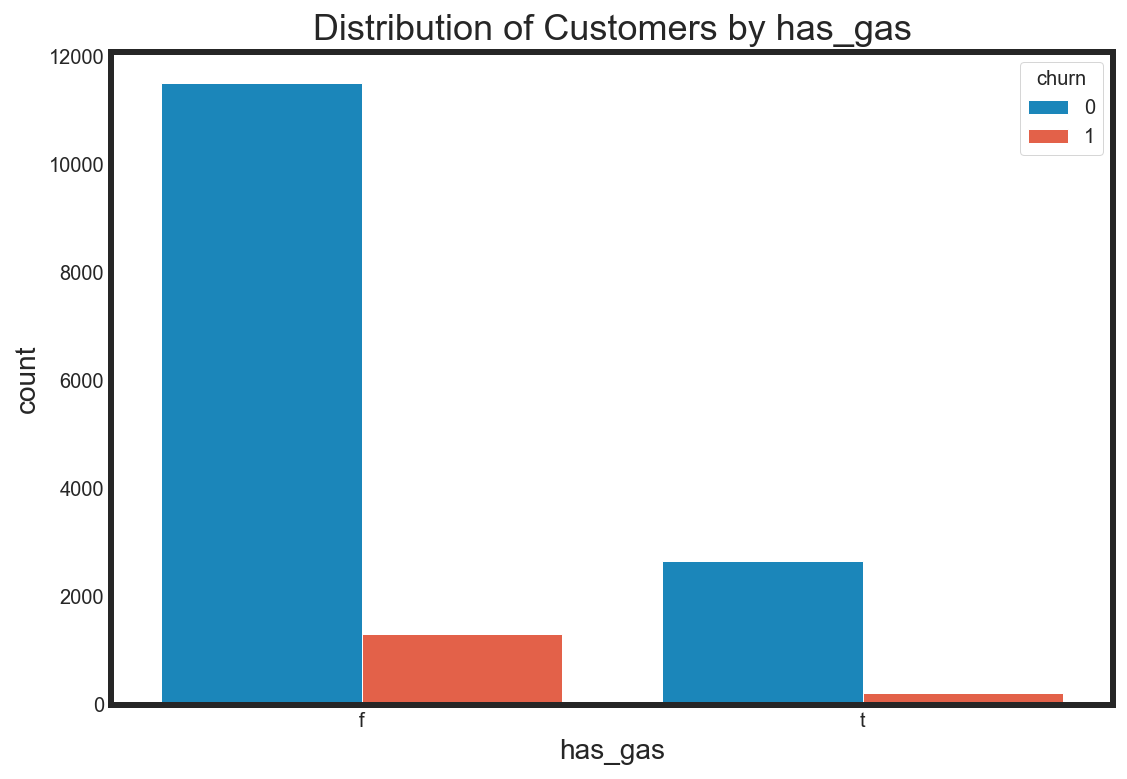

In [92]:
sns.countplot(x = 'has_gas', hue = 'churn',data= train_clean);
plt.title('Distribution of Customers by has_gas');

Observation:
- A majority of customers are only electricity customers. This kind of customers are more likely to churn.

In [ ]:
train_clean.head()

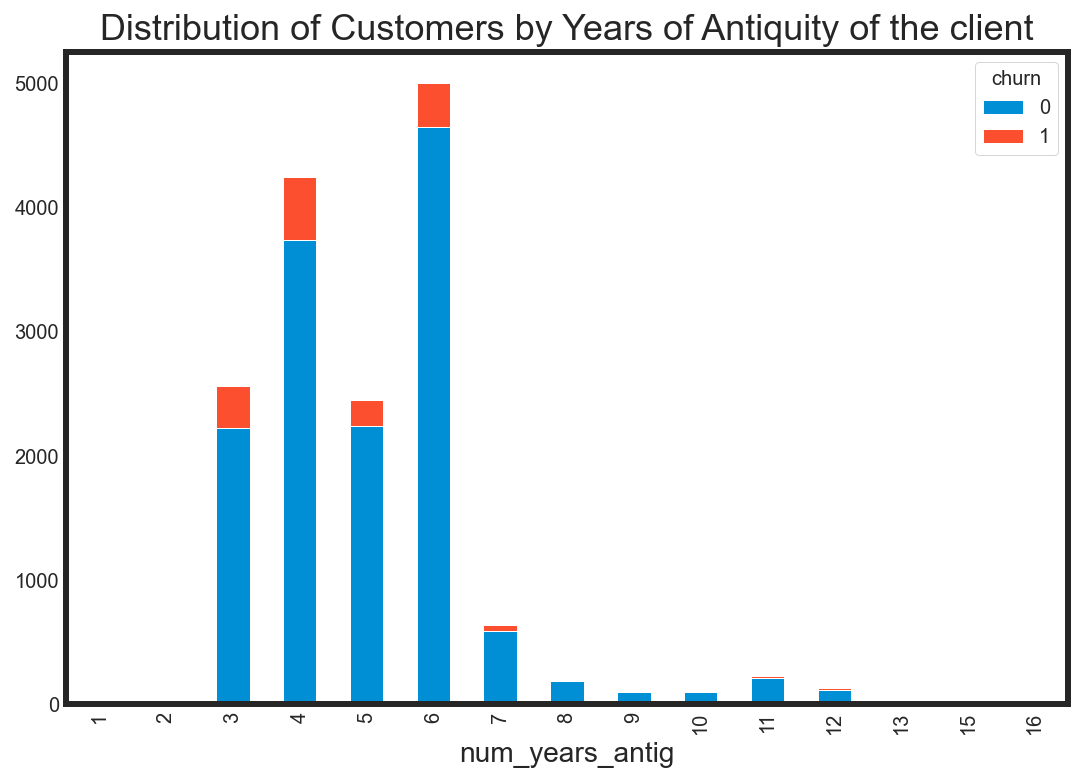

In [93]:
ct = pd.crosstab(train_clean.num_years_antig, train_clean.churn);
ct.plot.bar(stacked=True);
plt.legend(title='churn');
plt.title('Distribution of Customers by Years of Antiquity of the client');

Observation:
- Customers who are associated with 3-6 years of antiquity are more likely to churn.

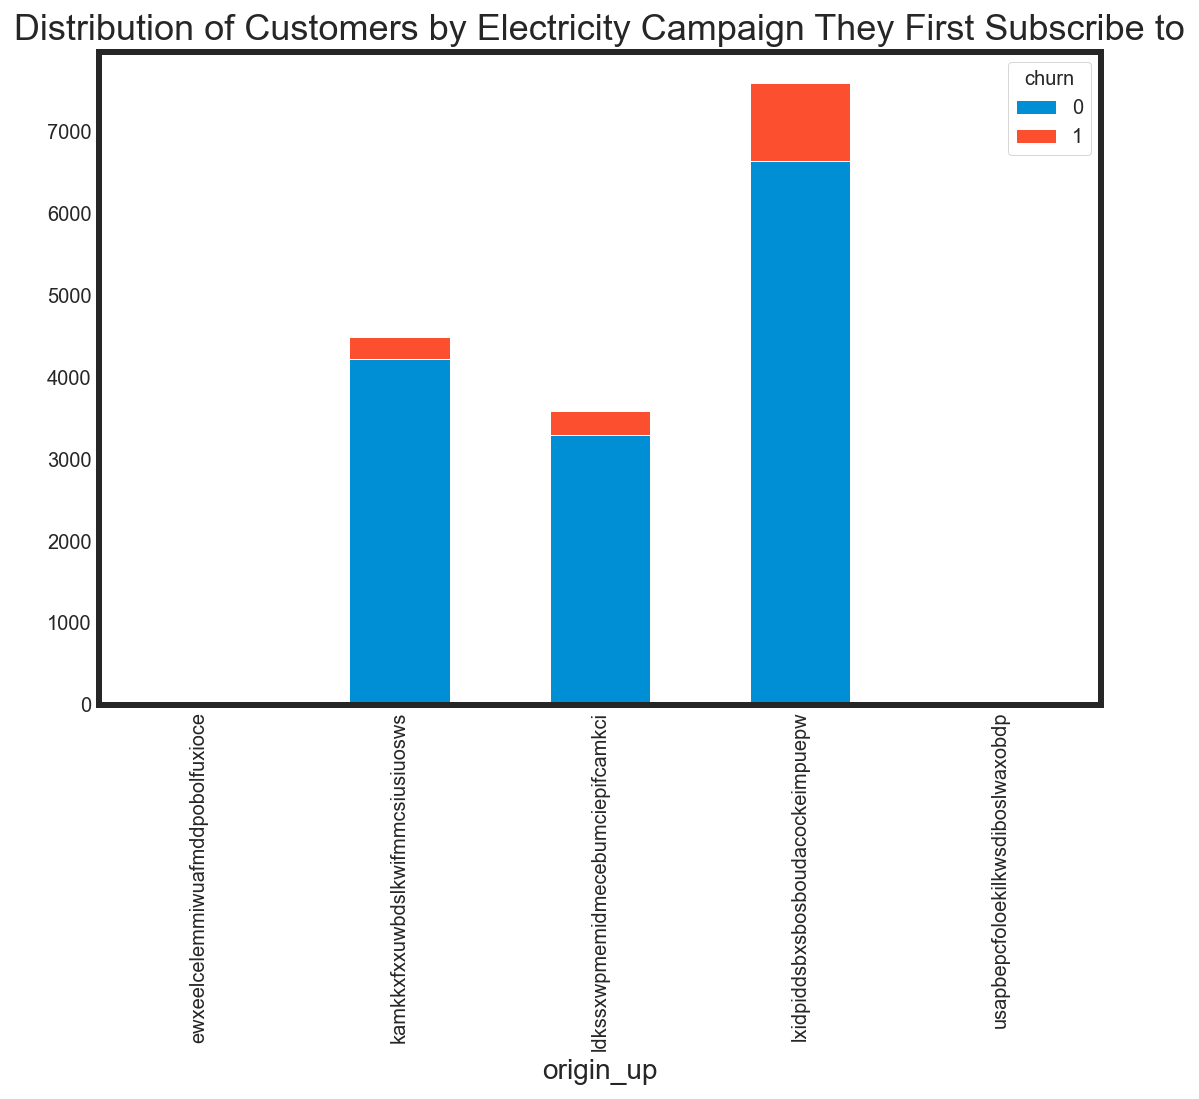

In [94]:
ct = pd.crosstab(train_clean.origin_up, train_clean.churn);
ct.plot.bar(stacked=True);
plt.legend(title='churn');
plt.title('Distribution of Customers by Electricity Campaign They First Subscribe to');

Observation:
- The electricity campaign begin with the letter 'l' has the most churned customers.

In [343]:
history_clean.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


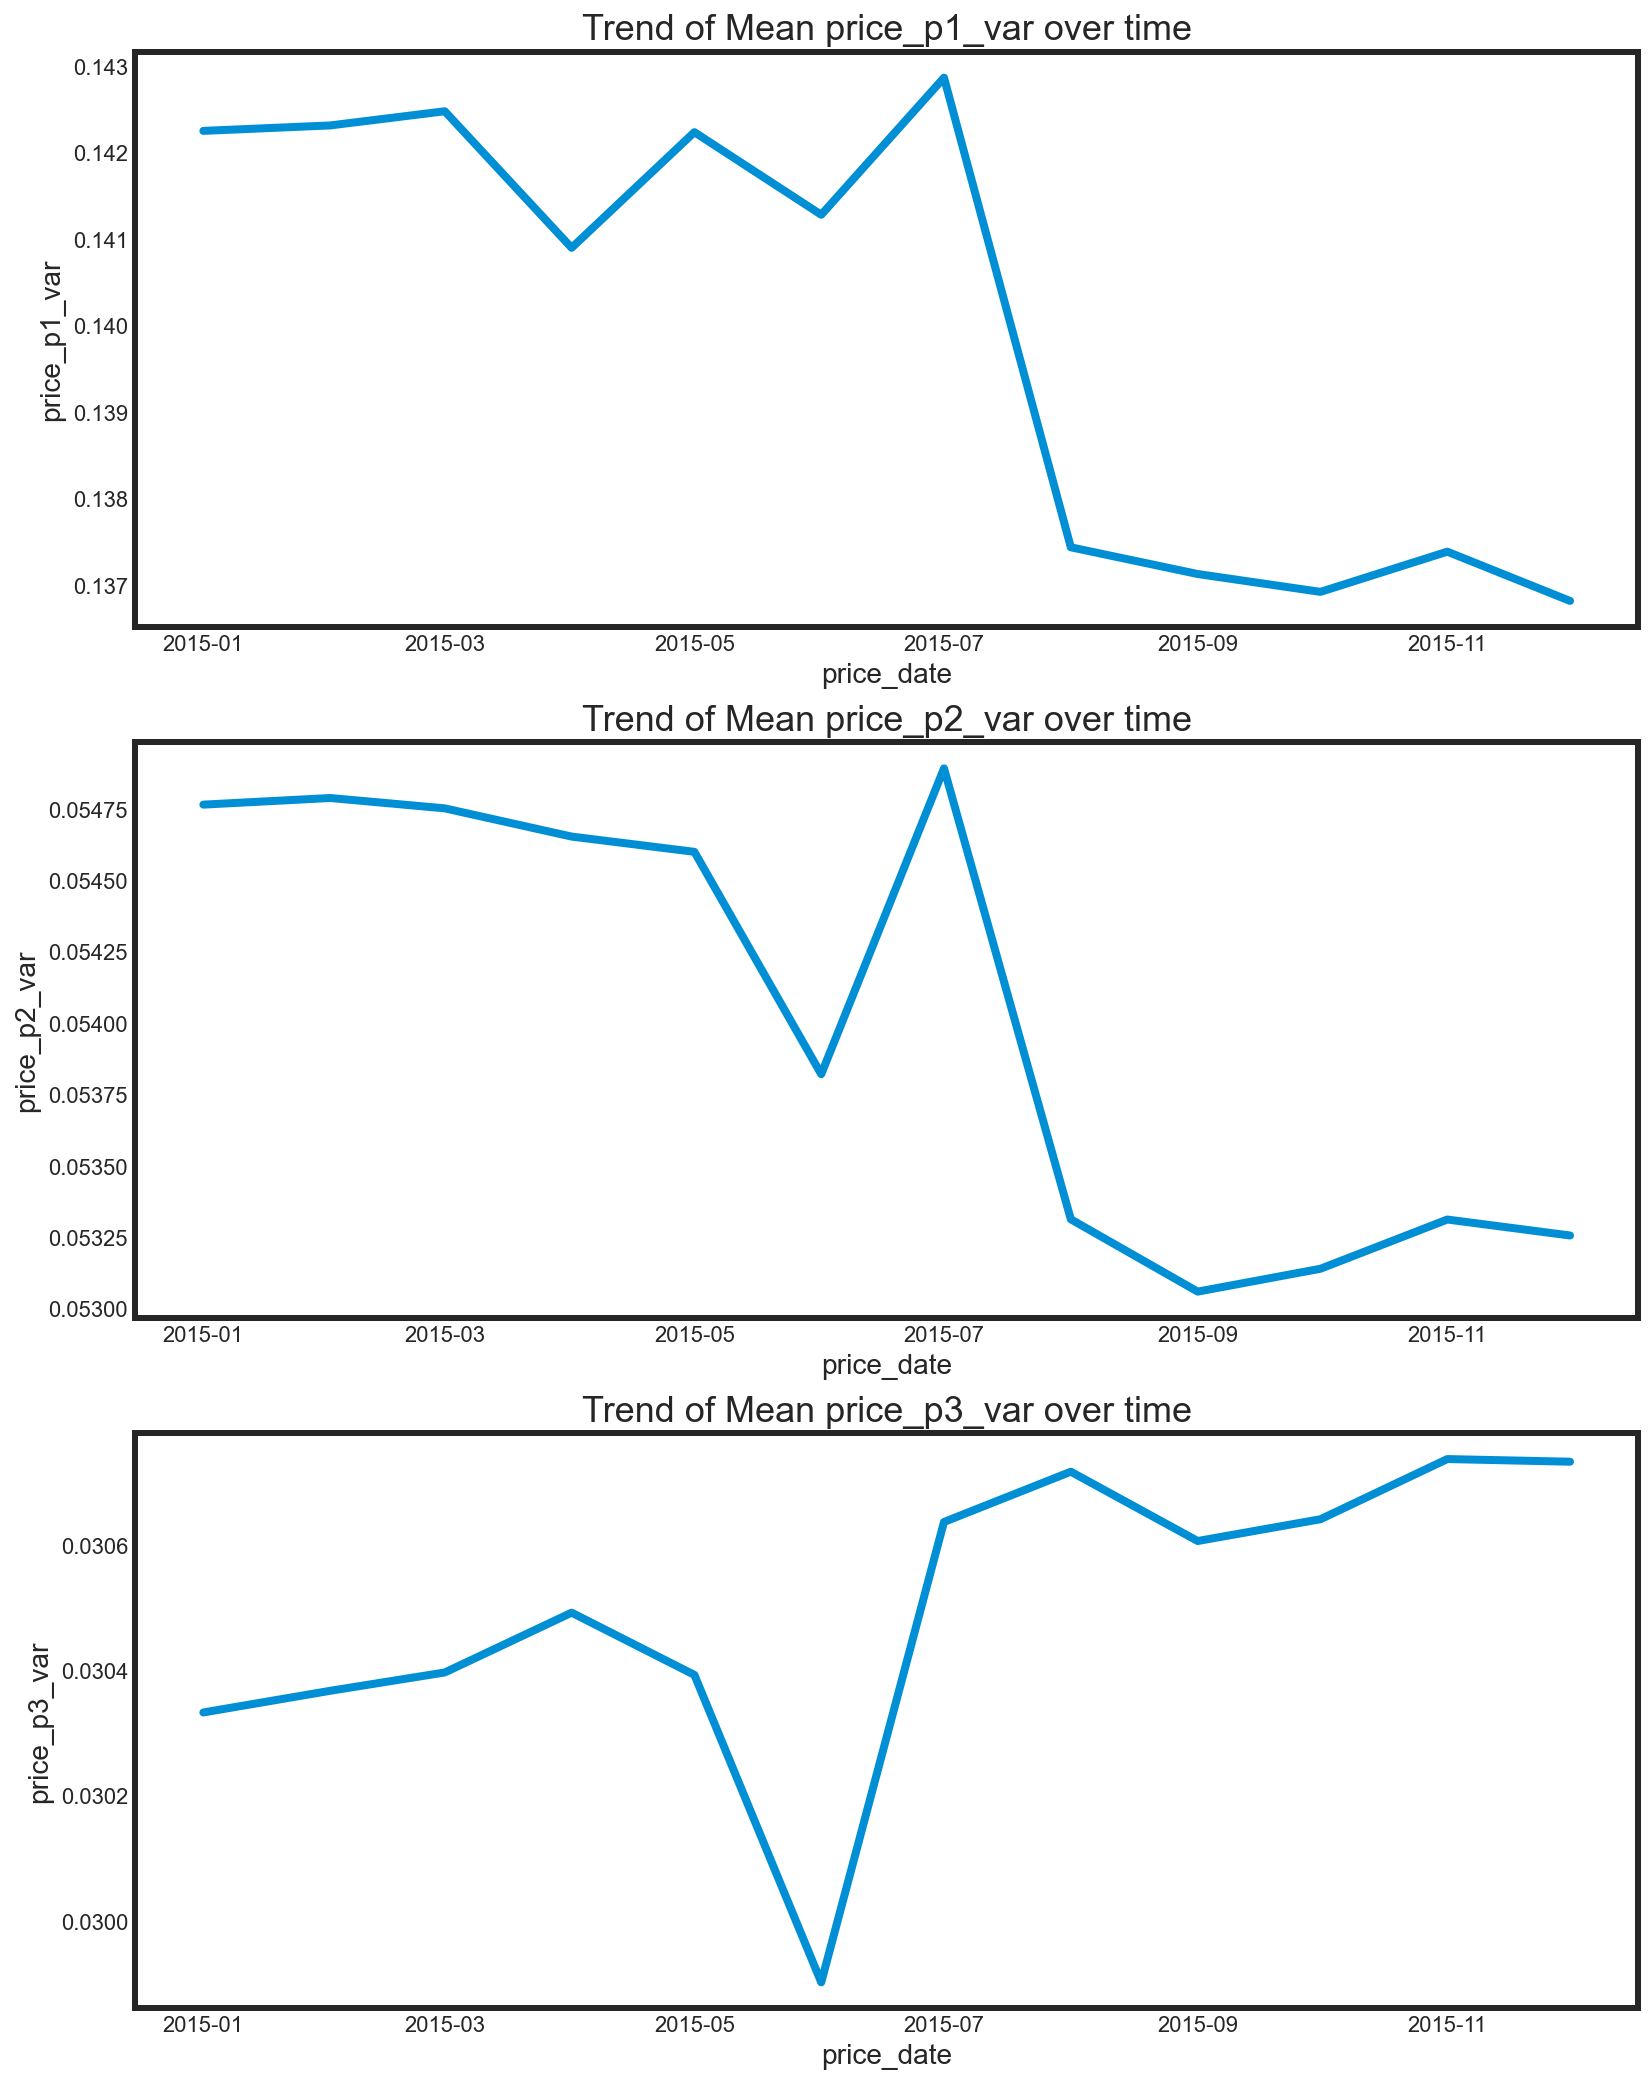

In [356]:
temp = history_clean[['price_date','price_p1_var','price_p2_var','price_p3_var']]
temp_price=temp.groupby(['price_date']).mean().reset_index()

fig = plt.figure(figsize = (12, 18))

ax1= fig.add_subplot(311) 
sns.lineplot(x = 'price_date', y='price_p1_var',  data = temp_price)
ax1.set(title="Trend of Mean price_p1_var over time");

ax2 = fig.add_subplot(312) 
sns.lineplot(x = 'price_date', y='price_p2_var',  data = temp_price)
ax2.set(title="Trend of Mean price_p2_var over time");

ax3 = fig.add_subplot(313) 
sns.lineplot(x = 'price_date', y='price_p3_var',  data = temp_price)
ax3.set(title="Trend of Mean price_p3_var over time");

Observations:
- From period 1 to period 3, mean energe price is overally getting lower.
- The mean price of period 1 and period 2 are getting lower over time. However, the mean price of period 3 is getting higher over time.

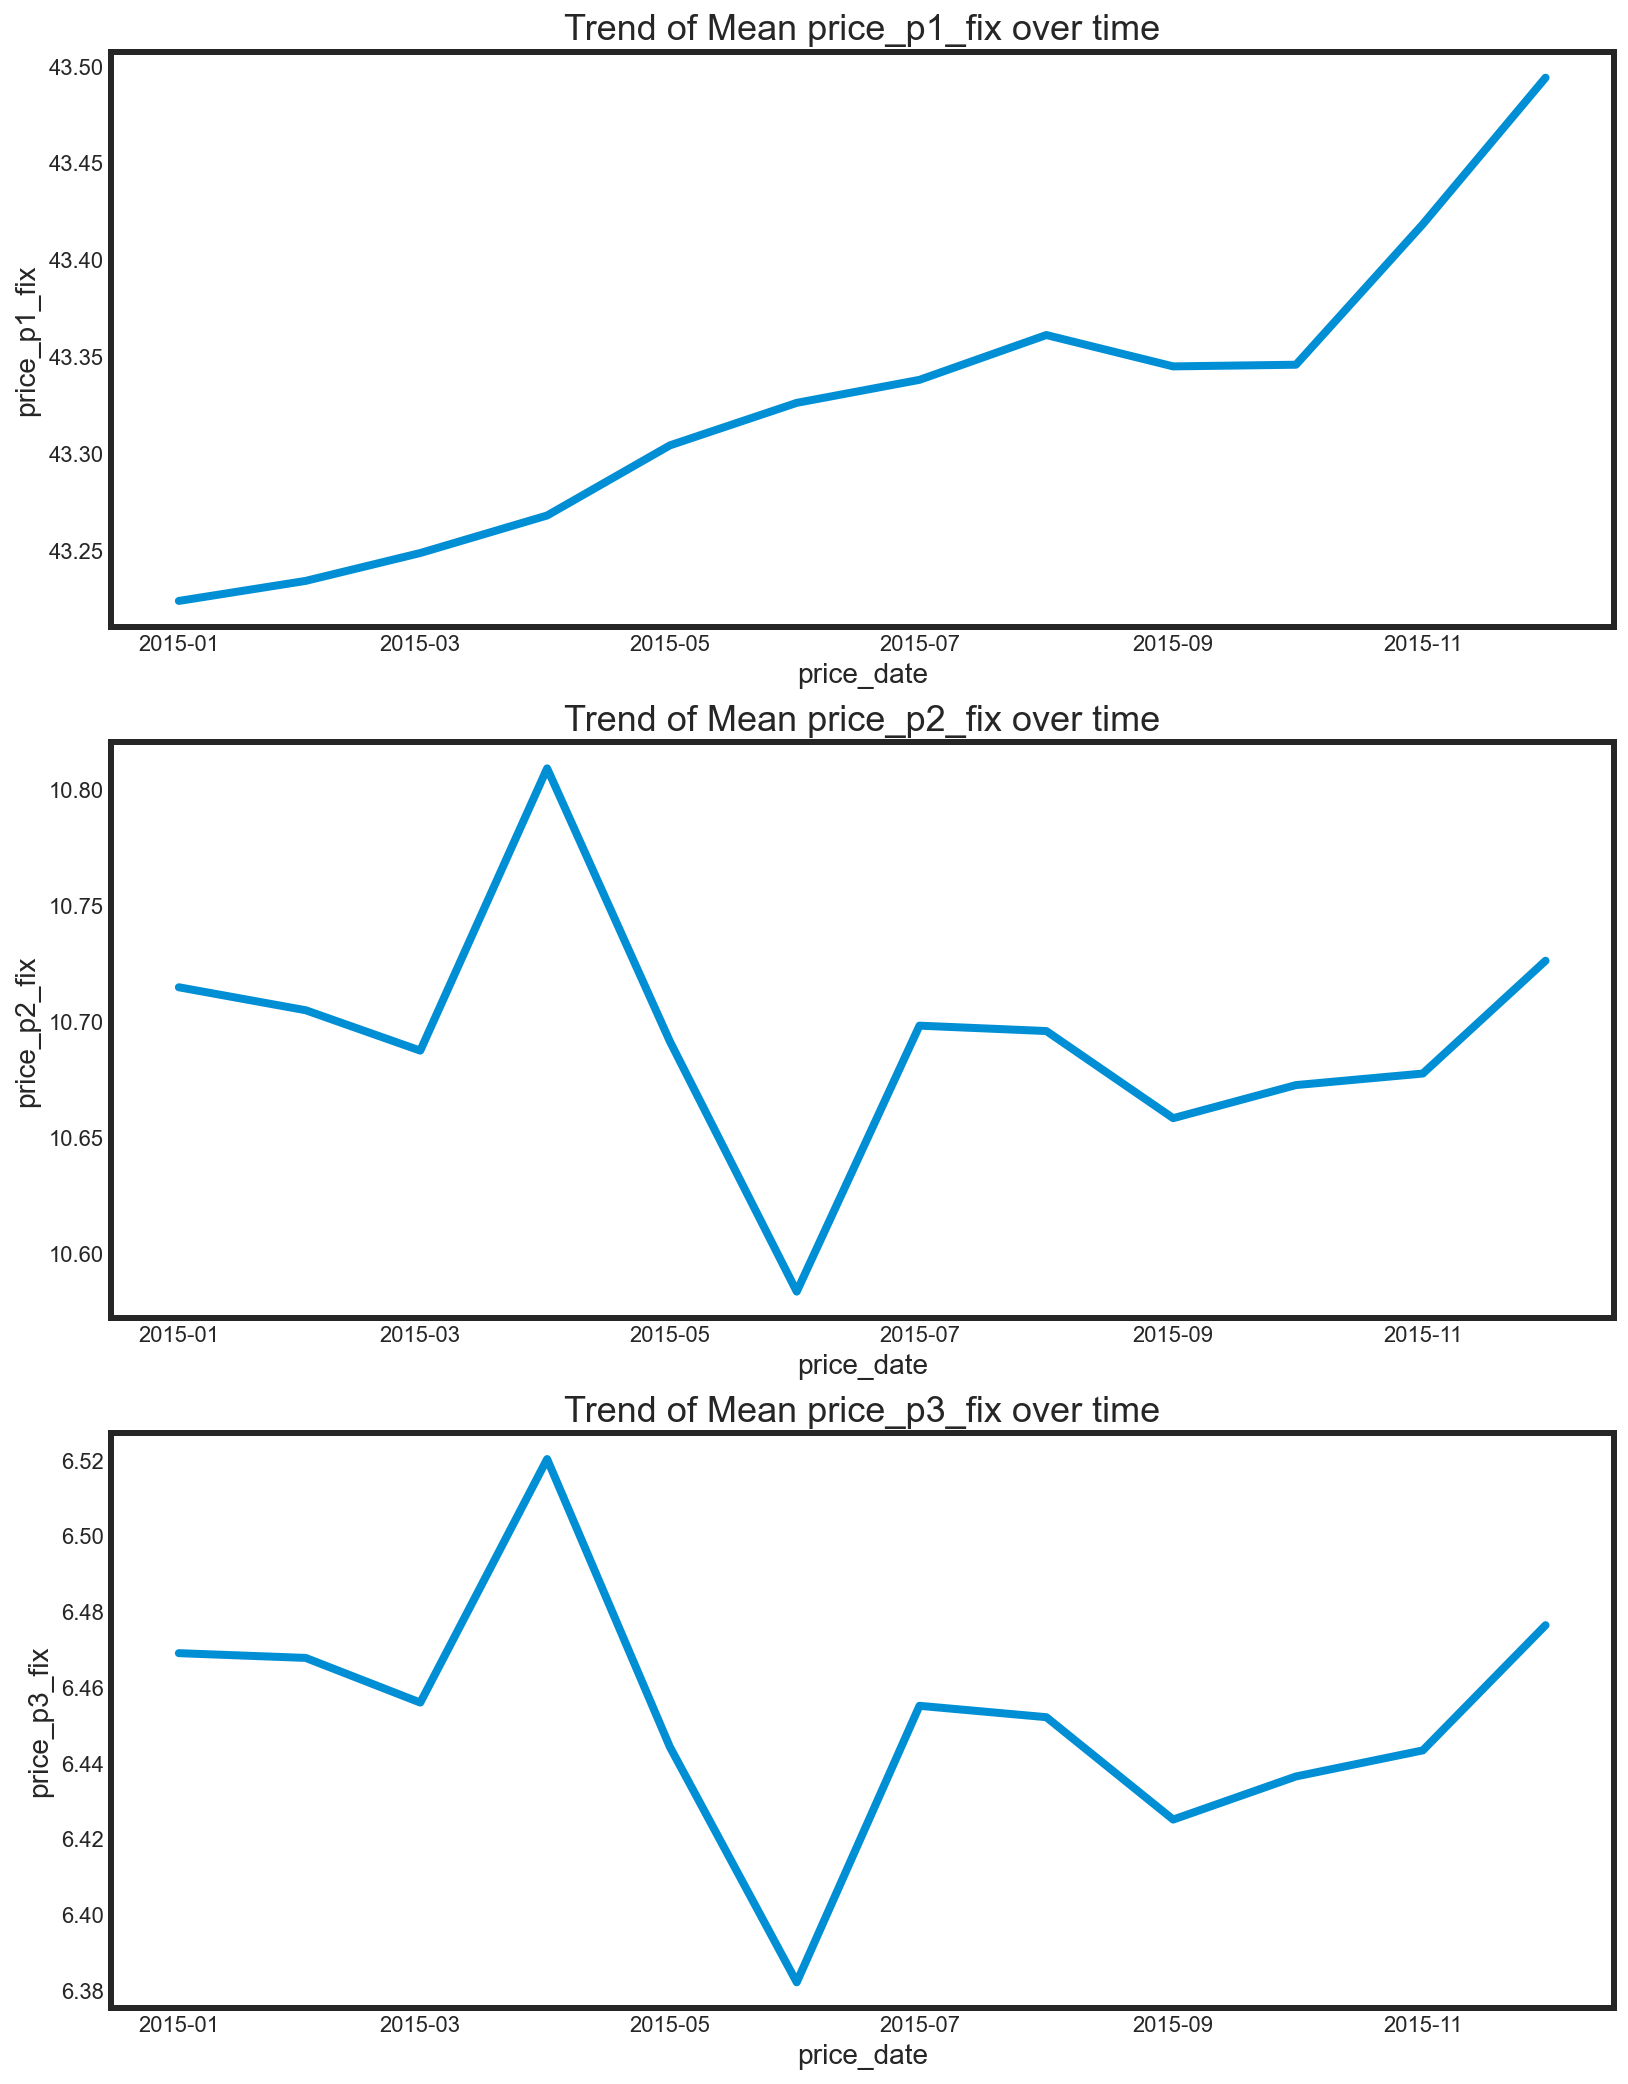

In [357]:
temp = history_clean[['price_date','price_p1_fix','price_p2_fix','price_p3_fix']]
temp_price=temp.groupby(['price_date']).mean().reset_index()

fig = plt.figure(figsize = (12, 18))

ax1= fig.add_subplot(311) 
sns.lineplot(x = 'price_date', y='price_p1_fix',  data = temp_price)
ax1.set(title="Trend of Mean price_p1_fix over time");

ax2 = fig.add_subplot(312) 
sns.lineplot(x = 'price_date', y='price_p2_fix',  data = temp_price)
ax2.set(title="Trend of Mean price_p2_fix over time");

ax3 = fig.add_subplot(313) 
sns.lineplot(x = 'price_date', y='price_p3_fix',  data = temp_price)
ax3.set(title="Trend of Mean price_p3_fix over time");

Observations:
- From period 1 to period 3, mean power price are overally getting lower.
- The mean price of period 1 is getting higher over time. However, the mean price of period2 and period 3 are fluctuating over time.

In [361]:
train_clean.to_csv('train_clean.csv', index = False)
history_clean.to_csv('history_clean.csv', index = False)